In [ ]:
# Importation et installation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix
from IPython.display import display, Markdown  # Pour afficher des résultats dans les notebooks
from collections import Counter
import io
import sys
from pandas import read_csv
import matplotlib.patches as mpatches


# Web scrapping

5 cryptomonnaies maximales : BTC, ETH, XRP, BNB, SOL, LINK pour une couverture équilibrée entre stabilité, innovation et volatilité.

In [6]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import time
import os
from datetime import datetime, timedelta

def configure_driver():
    chrome_options = Options()
    # Options pour éviter la détection
    chrome_options.add_argument("--disable-blink-features=AutomationControlled")
    chrome_options.add_argument("--disable-extensions")
    chrome_options.add_argument("--no-sandbox")
    chrome_options.add_argument("--disable-infobars")
    chrome_options.add_argument("--disable-dev-shm-usage")
    chrome_options.add_argument("--disable-browser-side-navigation")
    chrome_options.add_argument("--disable-gpu")
    
    # Ajout d'un user agent réaliste
    chrome_options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36")

    # Configuration des préférences
    chrome_prefs = {}
    chrome_options.experimental_options["prefs"] = chrome_prefs
    chrome_prefs["profile.default_content_settings"] = {"images": 2}
    chrome_prefs["profile.managed_default_content_settings"] = {"images": 2}

    return webdriver.Chrome(
        service=Service(ChromeDriverManager().install()),
        options=chrome_options
    )

def get_default_month():
    default_date = datetime.today() - timedelta(days=62)
    return default_date.strftime("%B")

def scrape_crypto_data(crypto_name, url):
    driver = configure_driver()
    driver.maximize_window()
    print(f"Traitement de {crypto_name}...")
    
    try:
        driver.get(url)
        time.sleep(20)  

        # Étape 1 : Vérifier et gérer la bannière des cookies avec plusieurs tentatives
        try:
            # Liste de sélecteurs possibles pour le bouton des cookies
            cookie_selectors = [
                (By.ID, "onetrust-accept-btn-handler"),
                (By.CLASS_NAME, "onetrust-accept-btn-handler"),
                (By.XPATH, "//button[contains(text(), 'Accept All')]"),
                (By.XPATH, "//button[contains(text(), 'Accept all')]"),
                (By.XPATH, "//button[contains(text(), 'Accepter')]"),
                (By.XPATH, "//button[contains(@class, 'cookie-accept')]"),
                (By.CSS_SELECTOR, ".cookie-consent button"),
                (By.CSS_SELECTOR, "#CybotCookiebotDialogBodyButtonAccept"),
                (By.CSS_SELECTOR, ".cmc-cookie-policy-banner__close"),
                (By.XPATH, "//button[contains(@class, 'banner-close-button')]")
            ]

            for selector_type, selector_value in cookie_selectors:
                try:
                    cookie_button = WebDriverWait(driver, 5).until(
                        EC.element_to_be_clickable((selector_type, selector_value))
                    )
                    time.sleep(2)
                    driver.execute_script("arguments[0].click();", cookie_button)
                    print(f"Bannière des cookies acceptée avec le sélecteur: {selector_value}")
                    time.sleep(3)
                    break
                except Exception:
                    continue

        except Exception as e:
            print(f"Tentative de gestion des cookies échouée: {str(e)}")
            print("Continuation du script...")

        # Étape 2 : Cliquer sur le bouton pour ouvrir le calendrier
        calendar_button = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((
                By.CSS_SELECTOR,
                ".sc-65e7f566-0.eQBACe.BaseButton_base__34gwo.bt-base.BaseButton_t-default__8BIzz.BaseButton_size-md__9TpuT.BaseButton_v-tertiary__AhlyE.BaseButton_vd__gUkWt"
            ))
        )
        calendar_button.click()
        print("Le calendrier a été ouvert avec succès.")
        time.sleep(2)

        # Étape 3 : Sélectionner dynamiquement le mois affiché par défaut
        default_month = get_default_month()
        default_month_button = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.XPATH, f"//span[contains(text(), '{default_month}')]"))
        )
        default_month_button.click()
        print(f"Cliqué sur '{default_month}'.")

        jan_button = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.XPATH, "//span[text()='Jan' and contains(@class, ' ')]"))
        )
        jan_button.click()
        print("Cliqué sur 'Jan'.")
        time.sleep(2)

        for _ in range(2):
            january_2024 = WebDriverWait(driver, 10).until(
                EC.element_to_be_clickable((By.XPATH, "//span[contains(text(), 'January')]"))
            )
            january_2024.click()
            print("Cliqué sur 'January 2024'.")
            time.sleep(1)

        year_2019 = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.XPATH, "//span[text()='2019' and contains(@class, ' ')]"))
        )
        year_2019.click()
        print("Sélectionné '2019'.")

        jan_2019 = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.XPATH, "//span[contains(@class, 'selected') and text()='Jan']"))
        )
        jan_2019.click()
        print("Cliqué sur 'Jan' pour 2019.")

        day_1_2019 = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((
                By.XPATH,
                "//div[contains(@class, 'react-datepicker__day--001') and contains(@aria-label, 'January 1st, 2019')]"
            ))
        )
        day_1_2019.click()
        print("Cliqué sur le jour '1er janvier 2019'.")
        time.sleep(2)

        january_2019 = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.XPATH, "//span[contains(text(), 'January')]"))
        )
        january_2019.click()
        print("Cliqué sur 'January 2019'.")

        dec_button = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.XPATH, "//span[text()='Dec' and contains(@class, ' ')]"))
        )
        dec_button.click()
        print("Cliqué sur 'Dec'.")

        for _ in range(2):
            december_2019 = WebDriverWait(driver, 10).until(
                EC.element_to_be_clickable((By.XPATH, "//span[contains(text(), 'December')]"))
            )
            december_2019.click()
            print("Cliqué sur 'December 2019'.")
            time.sleep(1)

        year_2024 = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.XPATH, "//span[text()='2024' and contains(@class, ' ')]"))
        )
        year_2024.click()
        print("Sélectionné '2024'.")

        dec_2024 = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.XPATH, "//span[contains(@class, 'selected') and text()='Dec']"))
        )
        dec_2024.click()
        print("Cliqué sur 'Dec' pour 2024.")

        day_31_2024 = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((
                By.XPATH,
                "//div[contains(@class, 'react-datepicker__day--031') and contains(@aria-label, 'December 31st, 2024')]"
            ))
        )
        day_31_2024.click()
        print("Cliqué sur le jour '31 décembre 2024'.")
        
        continue_button = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.XPATH, "//button[contains(text(), 'Continue')]"))
        )
        continue_button.click()
        print("Cliqué sur le bouton 'Continue' pour appliquer les dates.")
        time.sleep(5)

        # Étape 4: Load More avec gestion du nombre maximal de clics
        for i in range(30):  # Nombre max de tentatives
            try:
                load_more_button = WebDriverWait(driver, 10).until(
                    EC.element_to_be_clickable((By.XPATH, "//button[contains(text(), 'Load More')]"))
                )
                load_more_button.click()
                print(f"Cliqué sur 'Load More' ({i+1}).")
                time.sleep(5)
            except Exception:
                print("Aucun bouton 'Load More' disponible, passage à l'extraction des données.")
                break

        # Étape 5: Extraction des données du tableau
        rows = driver.find_elements(By.CSS_SELECTOR, "table tbody tr")
        data = [[cell.text.strip() for cell in row.find_elements(By.TAG_NAME, "td")] for row in rows]

        df = pd.DataFrame(data, columns=["Date", "Open", "High", "Low", "Close", "Volume", "Market Cap"])
        df["Cryptocurrency"] = crypto_name

        # Assurez-vous que le dossier "Data" existe, sinon créez-le
        data_folder = "Data"
        if not os.path.exists(data_folder):
            os.makedirs(data_folder)  

        file_path = os.path.join(data_folder, f"{crypto_name}_data.csv")  # Chemin complet du fichier
        df.to_csv(file_path, index=False)
        print(f"[{crypto_name}] Données sauvegardées dans {file_path}")   


    except Exception as e:
        print(f"Erreur lors de l'interaction avec {crypto_name}: {e}")
    finally:
        driver.quit()


if __name__ == "__main__":
    # Liste des URLs et des noms des cryptomonnaies
    cryptos = {
        "BTC": "https://coinmarketcap.com/currencies/bitcoin/historical-data/",
        "ETH": "https://coinmarketcap.com/currencies/ethereum/historical-data/",
        "XRP": "https://coinmarketcap.com/currencies/xrp/historical-data/",
        "BNB": "https://coinmarketcap.com/currencies/bnb/historical-data/",
        "LINK": "https://coinmarketcap.com/currencies/chainlink/historical-data/",
        "SOL": "https://coinmarketcap.com/currencies/solana/historical-data/"
    }
    # Lancer le scraping pour chaque cryptomonnaie
    for crypto_name, url in cryptos.items():
        scrape_crypto_data(crypto_name, url)

Traitement de BTC...
Bannière des cookies acceptée avec le sélecteur: onetrust-accept-btn-handler
Le calendrier a été ouvert avec succès.
Cliqué sur 'December'.
Cliqué sur 'Jan'.
Cliqué sur 'January 2024'.
Cliqué sur 'January 2024'.
Sélectionné '2019'.
Cliqué sur 'Jan' pour 2019.
Cliqué sur le jour '1er janvier 2019'.
Cliqué sur 'January 2019'.
Cliqué sur 'Dec'.
Cliqué sur 'December 2019'.
Cliqué sur 'December 2019'.
Sélectionné '2024'.
Cliqué sur 'Dec' pour 2024.
Cliqué sur le jour '31 décembre 2024'.
Cliqué sur le bouton 'Continue' pour appliquer les dates.
Cliqué sur 'Load More' (1).
Cliqué sur 'Load More' (2).
Cliqué sur 'Load More' (3).
Cliqué sur 'Load More' (4).
Cliqué sur 'Load More' (5).
Cliqué sur 'Load More' (6).
Cliqué sur 'Load More' (7).
Cliqué sur 'Load More' (8).
Cliqué sur 'Load More' (9).
Cliqué sur 'Load More' (10).
Cliqué sur 'Load More' (11).
Cliqué sur 'Load More' (12).
Cliqué sur 'Load More' (13).
Cliqué sur 'Load More' (14).
Cliqué sur 'Load More' (15).
Cliqué s

# Importation et nettoyage des fichiers de cryptomonnaies issus du webscraping

In [8]:
# Spécifiez le chemin du fichier
csv_dir = './Data/'
# Liste des cryptomonnaies
cryptos = ["BTC", "ETH", "XRP", "BNB", "SOL", "LINK"]

# Dictionnaire pour stocker les DataFrames nettoyés
crypto_dataframes = {}

# Fonction pour traiter un fichier CSV
def process_crypto_data(crypto_name):
    # Charger le fichier CSV
    file_path = os.path.join(csv_dir, f"{crypto_name}_data.csv")
    df = pd.read_csv(file_path)

    # Convertir la colonne 'Date' en type datetime
    df['Date'] = pd.to_datetime(df['Date'], format="%b %d, %Y")

    # Trier par date croissante
    df = df.sort_values(by='Date')

    # Nettoyer les colonnes numériques (supprimer les '$' et ',' et convertir en float)
    for col in ['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap']:
        df[col] = df[col].replace({'\$': '', ',': ''}, regex=True).astype(float)

    # Supprimer les lignes complètement vides
    df = df.dropna(how='all')

    # Définir 'Date' comme index
    df.set_index('Date', inplace=True)

    # Vérifier les types des colonnes
    print(f"Types des colonnes pour {crypto_name} :")
    print(df.dtypes)

    # Assigner le DataFrame nettoyé au dictionnaire
    crypto_dataframes[crypto_name] = df

# Boucle pour traiter chaque cryptomonnaie
for crypto in cryptos:
    process_crypto_data(crypto)

# Vérification des DataFrames
for crypto_name, df in crypto_dataframes.items():
    print(f"DataFrame pour {crypto_name} :")
    print(df.head())


Types des colonnes pour BTC :
Open              float64
High              float64
Low               float64
Close             float64
Volume            float64
Market Cap        float64
Cryptocurrency     object
dtype: object
Types des colonnes pour ETH :
Open              float64
High              float64
Low               float64
Close             float64
Volume            float64
Market Cap        float64
Cryptocurrency     object
dtype: object
Types des colonnes pour XRP :
Open              float64
High              float64
Low               float64
Close             float64
Volume            float64
Market Cap        float64
Cryptocurrency     object
dtype: object
Types des colonnes pour BNB :
Open              float64
High              float64
Low               float64
Close             float64
Volume            float64
Market Cap        float64
Cryptocurrency     object
dtype: object
Types des colonnes pour SOL :
Open              float64
High              float64
Low           

In [9]:
# Fonction pour chaque DataFrame pour chaque cryptomonnaie
def create_crypto_dataframes(dataframes_dict):
    for crypto_name, df in dataframes_dict.items():
        globals()[f"{crypto_name}_df"] = df

# Appeler la fonction
create_crypto_dataframes(crypto_dataframes)

In [10]:
def check_crypto_dataframes(dataframes_dict):
    for crypto_name, df in dataframes_dict.items():
        # Récupérer le shape du DataFrame
        df_shape = df.shape

        # Récupérer la date minimum et la date maximum
        min_date = df.index.min()
        max_date = df.index.max()

        # Afficher les informations
        print(f"{crypto_name}_df:")
        print(f"- Shape: {df_shape}")
        print(f"- Date minimum: {min_date}")
        print(f"- Date maximum: {max_date}")
        print("\n")

# Appeler la fonction sur le dictionnaire crypto_dataframes
check_crypto_dataframes(crypto_dataframes)


BTC_df:
- Shape: (2197, 7)
- Date minimum: 2018-12-27 00:00:00
- Date maximum: 2024-12-31 00:00:00


ETH_df:
- Shape: (2197, 7)
- Date minimum: 2018-12-27 00:00:00
- Date maximum: 2024-12-31 00:00:00


XRP_df:
- Shape: (2197, 7)
- Date minimum: 2018-12-27 00:00:00
- Date maximum: 2024-12-31 00:00:00


BNB_df:
- Shape: (2197, 7)
- Date minimum: 2018-12-27 00:00:00
- Date maximum: 2024-12-31 00:00:00


SOL_df:
- Shape: (1726, 7)
- Date minimum: 2020-04-11 00:00:00
- Date maximum: 2024-12-31 00:00:00


LINK_df:
- Shape: (2196, 7)
- Date minimum: 2018-12-27 00:00:00
- Date maximum: 2024-12-31 00:00:00




Attention : une seule donnée manquante venant de la cryptomonnaie link

In [11]:
# Comparer les dates entre deux cryptomonnaies et identifier les dates manquantes
def find_missing_dates(base_crypto, target_crypto, dataframes_dict):
    # Récupérer les index (dates) des deux DataFrames
    base_dates = dataframes_dict[base_crypto].index
    target_dates = dataframes_dict[target_crypto].index

    # Trouver les dates présentes dans base_crypto mais absentes dans target_crypto
    missing_dates = base_dates.difference(target_dates)

    print(f"Dates manquantes dans {target_crypto} par rapport à {base_crypto}:")
    print(missing_dates)
    return missing_dates

# Comparer BTC avec LINK
missing_dates_link = find_missing_dates("BTC", "LINK", crypto_dataframes)


Dates manquantes dans LINK par rapport à BTC:
DatetimeIndex(['2022-07-31'], dtype='datetime64[ns]', name='Date', freq=None)


Link manque de données pour le 31 juillet 2022.

Une vérification sur le site de webscraping a confirmé l'absence de la donnée sur le site.

On va remplacer ces valeurs avec les données de la veille : 3O juillet 2022

In [8]:
# Ajouter une ligne manquante au DataFrame de LINK
def add_missing_date(dataframes_dict, crypto_name, missing_date):
    df = dataframes_dict[crypto_name]

    # Vérifier si la date précédente existe dans le DataFrame
    previous_date = missing_date - pd.Timedelta(days=1)
    if previous_date not in df.index:
        print(f"La date précédente {previous_date} n'existe pas dans {crypto_name}_df.")
        return

    # Récupérer les données de la veille
    previous_data = df.loc[previous_date].copy()

    # Ajouter la nouvelle ligne pour la date manquante
    df.loc[missing_date] = previous_data

    # Trier l'index pour maintenir l'ordre chronologique
    df = df.sort_index()

    # Réassigner le DataFrame mis à jour au dictionnaire
    dataframes_dict[crypto_name] = df
    print(f"Ligne pour la date {missing_date} ajoutée dans {crypto_name}_df.")

# Ajouter la ligne manquante dans LINK pour la date 2022-07-31
missing_date = pd.Timestamp('2022-07-31')
add_missing_date(crypto_dataframes, 'LINK', missing_date)

# Vérification
print(crypto_dataframes['LINK'].loc['2022-07-30':'2022-08-01'])
print("new link df shape")
LINK_df.shape

Ligne pour la date 2022-07-31 00:00:00 ajoutée dans LINK_df.
              Open    High     Low   Close       Volume    Market Cap  \
Date                                                                    
2022-07-30  7.9126  8.1828  7.7222  7.8034  689235259.0  3.660569e+09   
2022-07-31  7.9126  8.1828  7.7222  7.8034  689235259.0  3.660569e+09   
2022-08-01  7.6659  7.8600  7.4388  7.5869  396160997.0  3.559007e+09   

           Cryptocurrency  
Date                       
2022-07-30           LINK  
2022-07-31           LINK  
2022-08-01           LINK  
new link df shape


(2197, 7)

# Data preprocessing

## Data Preprocessor

In [9]:
class DataPreprocessor:

    def __init__(self):
        pass

    def CustomSmoother(self, x, alpha):
        if not isinstance(x, np.ndarray):
            raise ValueError("Input x should be a NumPy array.")

        s0 = x[0]
        smoothed_statistic = [s0]
        n = x.shape[0]
        for i in range(1, n):
            s1 = alpha * x[i] + (1 - alpha) * s0
            smoothed_statistic.append(s1)
            s0 = s1

        result = np.array(smoothed_statistic)

        # Affichage des résultats
        print("\n--- Résultat de CustomSmoother ---")
        print(f"Forme d'entrée : {x.shape}")
        print(f"Forme de sortie : {result.shape}")
        print(f"Valeurs (5 premières): {result[:5]}")

        return result

    # def PandaSmoother(self, x):
    #     if not isinstance(x, (np.ndarray, list)):
    #         raise ValueError("Input x should be a NumPy array or list.")

    #     return pd.Series(x).ewm(span=20).mean()

    def PandaSmoother(self, x):
      if not isinstance(x, (np.ndarray, list)):
          raise ValueError("Input x should be a NumPy array or list.")

      x = np.array(x)

      if x.ndim == 2:
          smoothed_data = np.apply_along_axis(
              lambda col: pd.Series(col).ewm(span=20, adjust=False).mean().fillna(col[0]).values,
              axis=0,
              arr=x
          )
      else:
          smoothed_data = pd.Series(x).ewm(span=20, adjust=False).mean().fillna(x[0]).values

      if smoothed_data.shape != x.shape:
          raise ValueError("Le format des données de sortie ne correspond pas à celui de l'entrée.")

      # Affichage des résultats
      print("\n--- Résultat de PandaSmoother ---")
      print(f"Forme d'entrée : {x.shape}")
      print(f"Forme de sortie : {smoothed_data.shape}")
      print(f"Valeurs (5 premières):\n {smoothed_data[:5]}")

      return smoothed_data

## Technical Indicators

In [10]:
def ema(x, p):
    """
    Calcul de la moyenne mobile exponentielle (EMA).

    Paramètres :
    x : np.ndarray
        Série de données sous forme d'un tableau NumPy.
    p : int
        Période de lissage pour l'EMA.

    Retour :
    np.ndarray :
        Série de données lissées avec EMA.
    """

    # Vérification des types d'entrée
    if not isinstance(x, np.ndarray):
        raise TypeError("L'entrée doit être un tableau NumPy.")

    # Vérification de la taille de la série de données
    if p > len(x):
        raise ValueError("La période p ne peut pas être supérieure à la taille de la série temporelle.")

    # Suppression des dimensions inutiles pour garantir un tableau unidimensionnel
    x = x.squeeze()

    # Affichage des informations sur les données d'entrée
    print("\n--- EMA - Informations sur les données d'entrée ---")
    print(f"Forme de x : {x.shape}")
    print(f"Valeurs (5 premières) : {x[:5]}")
    print(f"Période de lissage : {p}")

    # Calcul de la moyenne initiale pour les p premières valeurs
    prev_ema = x[:p].mean()

    # Initialisation de la liste pour stocker les valeurs EMA
    ema_values = [prev_ema]

    # Calcul du multiplicateur pour le lissage exponentiel
    multiplier = 2 / float(p + 1)

    # Calcul de l'EMA pour chaque valeur restante de la série temporelle
    for i in range(p, len(x)):
        cur_ema = (x[i] - prev_ema) * multiplier + prev_ema
        prev_ema = cur_ema
        ema_values.append(cur_ema)

    # Conversion de la liste en tableau NumPy
    ema_array = np.array(ema_values)

    # Affichage des résultats
    print("\n--- Résultat du calcul de l'EMA ---")
    print(f"Forme de la sortie : {ema_array.shape}")
    print(f"Valeurs (5 premières) : {ema_array[:5]}")
    print(f"Valeurs (5 dernières) : {ema_array[-5:]}")

    return ema_array

###############################################################################

def getRSI(x):
    """
    Calcule l'indice de force relative (RSI) sur une série de données.

    Paramètres :
    x : np.ndarray
        Série de données de prix.

    Retour :
    np.ndarray :
        Un tableau contenant les valeurs du RSI et les prix correspondants.
    """

    # Suppression des dimensions inutiles
    x = x.squeeze()

    # Vérification de la taille minimale des données
    if len(x) < 14:
        raise ValueError("La taille des données doit être d'au moins 14 pour calculer le RSI.")

    # Affichage des informations sur les données d'entrée
    print("\n--- RSI - Informations sur les données d'entrée ---")
    print(f"Forme de x : {x.shape}")
    print(f"Valeurs (5 premières) : {x[:5]}")
    print(f"Valeurs (5 dernières) : {x[-5:]}")

    # Définition des variables initiales
    n = len(x)
    x0 = x[:n-1]
    x1 = x[1:]
    change = x1 - x0

    # Calcul des gains et pertes initiaux
    gain = np.sum(change[change > 0][:14])
    loss = np.sum(np.abs(change[change < 0][:14]))

    avgGain = [gain / 14.0]
    avgLoss = [loss / 14.0]

    # Calcul progressif de l'EMA des gains/pertes
    for i in range(14, n-1):
        if change[i] >= 0:
            avgGain.append((avgGain[-1] * 13 + change[i]) / 14.0)
            avgLoss.append((avgLoss[-1] * 13) / 14.0)
        else:
            avgGain.append((avgGain[-1] * 13) / 14.0)
            avgLoss.append((avgLoss[-1] * 13 + abs(change[i])) / 14.0)

    # Calcul du RSI
    avgGain = np.array(avgGain)
    avgLoss = np.array(avgLoss)
    RS = avgGain / avgLoss
    RSI = 100 - (100 / (1 + RS))

    result = np.c_[RSI, x1[13:]]

    # Affichage des résultats
    print("\n--- Résultat du calcul du RSI ---")
    print(f"Forme de la sortie : {result.shape}")
    print(f"Valeurs RSI (5 premières): {result[:5, 0]}")
    print(f"Prix correspondants (5 premiers): {result[:5, 1]}")
    print(f"Valeurs RSI (5 dernières): {result[-5:, 0]}")
    print(f"Prix correspondants (5 derniers): {result[-5:, 1]}")

    return result

###############################################################################

def getStochasticOscillator(x):
    """
    Calcule l'oscillateur stochastique basé sur les données de marché.

    Paramètres :
    x : np.ndarray
        Données de marché sous forme d'un tableau NumPy avec les colonnes Open, High, Low, Close.

    Retour :
    np.ndarray :
        Un tableau contenant les valeurs de %K et les prix de clôture correspondants.
    """

    # Vérification de la taille minimale des colonnes
    if x.shape[1] < 4:
        raise ValueError("L'entrée doit contenir au moins 4 colonnes : Open, High, Low, Close.")

    # Extraction des colonnes High, Low et Close
    high = x[:,1].squeeze()
    low = x[:,2].squeeze()
    close = x[:,3].squeeze()

    # Affichage des informations d'entrée
    print("\n--- StochasticOscillator - Informations sur les données d'entrée ---")
    print(f"Forme des données : {x.shape}")
    print(f"Valeurs High (5 premières) : {high[:5]}")
    print(f"Valeurs Low (5 premières) : {low[:5]}")
    print(f"Valeurs Close (5 premières) : {close[:5]}")

    # Vérification du nombre minimal de données
    n = len(high)
    if n < 14:
        raise ValueError("Les données doivent contenir au moins 14 périodes pour calculer l'oscillateur stochastique.")

    # Calcul des plus hauts et plus bas sur une fenêtre de 14 jours
    highestHigh = [high[i:i+14].max() for i in range(n-13)]
    lowestLow = [low[i:i+14].min() for i in range(n-13)]

    # Affichage des données calculées
    print("\n--- Valeurs calculées ---")
    print(f"Taille de highestHigh : {len(highestHigh)}")
    print(f"Taille de lowestLow : {len(lowestLow)}")
    print(f"Valeurs highestHigh (5 premières) : {highestHigh[:5]}")
    print(f"Valeurs lowestLow (5 premières) : {lowestLow[:5]}")

    # Conversion des listes en tableaux NumPy
    highestHigh = np.array(highestHigh)
    lowestLow = np.array(lowestLow)

    # Vérification de la division par zéro
    if np.any(highestHigh == lowestLow):
        raise ValueError("Le prix le plus haut et le plus bas sont égaux, division par zéro détectée.")

    # Calcul de l'oscillateur stochastique %K
    k = 100 * ((close[13:] - lowestLow) / (highestHigh - lowestLow))

    # Affichage des résultats
    print("\n--- Résultats finaux ---")
    print(f"Forme de k : {k.shape}")
    print(f"Valeurs %K (5 premières) : {k[:5]}")
    print(f"Valeurs Close (5 dernières) : {close[-5:]}")

    # Retourner le résultat avec les valeurs %K et les prix de clôture correspondants
    result = np.c_[k, close[13:]]

    print("\n--- Résumé de la sortie du StochasticOscillator ---")
    print(f"Forme de la sortie : {result.shape}")
    print(f"Valeurs de sortie (5 premières lignes) :\n{result[:5]}")

    return result

###############################################################################

def getWilliams(x):
    """
    Calcule l'indicateur Williams %R basé sur les données de marché.

    Paramètres :
    x : np.ndarray
        Données de marché sous forme d'un tableau NumPy avec les colonnes Open, High, Low, Close.

    Retour :
    np.ndarray :
        Un tableau contenant les valeurs de Williams %R et les prix de clôture correspondants.
    """

    # Vérification de la taille minimale des colonnes
    if x.shape[1] < 4:
        raise ValueError("L'entrée doit contenir au moins 4 colonnes : Open, High, Low, Close.")

    # Extraction des colonnes High, Low et Close
    high = x[:,1].squeeze()
    low = x[:,2].squeeze()
    close = x[:,3].squeeze()

    # Affichage des informations sur les données d'entrée
    print("\n--- Williams - Informations sur les données d'entrée ---")
    print(f"Forme des données : {x.shape}")
    print(f"Valeurs High (5 premières) : {high[:5]}")
    print(f"Valeurs Low (5 premières) : {low[:5]}")
    print(f"Valeurs Close (5 premières) : {close[:5]}")

    # Vérification du nombre minimal de données
    n = len(high)
    if n < 14:
        raise ValueError("Les données doivent contenir au moins 14 périodes pour calculer l'indicateur Williams %R.")

    # Calcul des plus hauts et plus bas sur une fenêtre de 14 jours
    highestHigh = [high[i:i+14].max() for i in range(n-13)]
    lowestLow = [low[i:i+14].min() for i in range(n-13)]

    # Conversion des listes en tableaux NumPy
    highestHigh = np.array(highestHigh)
    lowestLow = np.array(lowestLow)

    # Affichage des plus hauts et plus bas calculés
    print("\n--- Valeurs calculées ---")
    print(f"Forme de highestHigh : {highestHigh.shape}")
    print(f"Forme de lowestLow : {lowestLow.shape}")
    print(f"Valeurs highestHigh (5 premières) : {highestHigh[:5]}")
    print(f"Valeurs lowestLow (5 premières) : {lowestLow[:5]}")

    # Vérification de la division par zéro
    if np.any(highestHigh == lowestLow):
        raise ValueError("Le prix le plus haut et le plus bas sont égaux, division par zéro détectée.")

    # Calcul de l'indicateur Williams %R
    w = -100 * ((highestHigh - close[13:]) / (highestHigh - lowestLow))

    # Affichage des résultats de l'indicateur Williams %R
    print("\n--- Résultats finaux ---")
    print(f"Forme de w : {w.shape}")
    print(f"Valeurs %R (5 premières) : {w[:5]}")
    print(f"Valeurs Close (5 dernières) : {close[-5:]}")

    # Retourner le résultat avec les valeurs %R et les prix de clôture correspondants
    result = np.c_[w, close[13:]]

    print("\n--- Résumé de la sortie du Williams ---")
    print(f"Forme de la sortie : {result.shape}")
    print(f"Valeurs de sortie (5 premières lignes) :\n{result[:5]}")

    return result

###############################################################################

def getMACD(close):
    """
    Calcule l'indicateur MACD basé sur la moyenne mobile exponentielle.

    Paramètres :
    close : np.ndarray
        Série de prix de clôture.

    Retour :
    np.ndarray :
        Tableau contenant les valeurs MACD et les prix de clôture correspondants.
    """

    # Vérification du type de données
    if not isinstance(close, np.ndarray):
        raise TypeError("L'entrée doit être un tableau NumPy.")

    # Suppression des dimensions inutiles
    close = close.squeeze()

    print("\n--- MACD - Informations sur les données d'entrée ---")
    print(f"Forme des prix de clôture : {close.shape}")
    print(f"Prix de clôture (5 premiers) : {close[:5]}")

    # Calcul des EMA de périodes 12 et 26
    ma1 = ema(close, 12)
    ma2 = ema(close, 26)

    print("\n--- Calcul des EMA ---")
    print(f"Forme de ma1 (EMA 12) : {ma1.shape}")
    print(f"Forme de ma2 (EMA 26) : {ma2.shape}")
    print(f"EMA 12 (5 premiers) : {ma1[:5]}")
    print(f"EMA 26 (5 premiers) : {ma2[:5]}")

    # Vérification de la longueur suffisante des EMA
    if len(ma1) < 14 or len(ma2) < 14:
        raise ValueError("Les moyennes mobiles doivent contenir au moins 14 éléments.")

    # Calcul de l'indicateur MACD
    macd = ma1[14:] - ma2

    print("\n--- Résultats du MACD ---")
    print(f"Forme de MACD : {macd.shape}")
    print(f"Valeurs MACD (5 premières) : {macd[:5]}")

    # Retourner les résultats sous forme de tableau avec les prix correspondants
    result = np.c_[macd, close[len(close) - len(macd):]]

    print("\n--- Résumé de la sortie du MACD---")
    print(f"Forme de la sortie : {result.shape}")
    print(f"Valeurs de sortie (5 premières lignes) :\n{result[:5]}")

    return result

###############################################################################

def getPriceRateOfChange(close, n_days):
    """
    Calcule le taux de changement du prix sur une période donnée.

    Paramètres :
    close : np.ndarray
        Série de prix de clôture.
    n_days : int
        Nombre de jours pour le calcul du taux de changement.

    Retour :
    np.ndarray :
        Tableau contenant le taux de changement et les prix correspondants.
    """

    # Vérification du type de données
    if not isinstance(close, np.ndarray):
        raise TypeError("L'entrée doit être un tableau NumPy.")

    # Vérification de la période
    if n_days >= len(close):
        raise ValueError("Le nombre de jours ne peut pas être supérieur à la taille de la série de prix.")

    # Suppression des dimensions inutiles
    close = close.squeeze()

    print("\n--- PriceRateOfChange - Informations sur les données d'entrée ---")
    print(f"Forme des prix de clôture : {close.shape}")
    print(f"Prix de clôture (5 premiers) : {close[:5]}")
    print(f"Période utilisée pour le calcul : {n_days}")

    # Séparation des données en deux séries
    x0 = close[:len(close) - n_days]
    x1 = close[n_days:]

    print("\n--- Données après séparation ---")
    print(f"Forme de x0 : {x0.shape}, valeurs (5 premières) : {x0[:5]}")
    print(f"Forme de x1 : {x1.shape}, valeurs (5 premières) : {x1[:5]}")

    # Vérification de la division par zéro
    if np.any(x0 == 0):
        raise ValueError("La division par zéro a été détectée dans les données de prix.")

    # Calcul du taux de changement
    PriceRateOfChange = (x1 - x0) / x0

    print("\n--- Calcul du taux de changement ---")
    print(f"Forme du taux de changement : {PriceRateOfChange.shape}")
    print(f"Taux de changement (5 premiers) : {PriceRateOfChange[:5]}")

    # Retourner les résultats sous forme de tableau avec les prix correspondants
    result = np.c_[PriceRateOfChange, x1]

    print("\n--- Résumé de la sortie du PriceRateOfChange ---")
    print(f"Forme de la sortie : {result.shape}")
    print(f"Valeurs de sortie (5 premières lignes) :\n{result[:5]}")

    return result

###############################################################################

def getOnBalanceVolume(X):
    """
    Calcule l'indicateur On-Balance Volume (OBV) basé sur les données de marché.

    Paramètres :
    X : np.ndarray
        Données de marché sous forme d'un tableau NumPy avec les colonnes Open, High, Low, Close, Volume.

    Retour :
    np.ndarray :
        Tableau contenant les valeurs OBV et les prix de clôture correspondants.
    """

    # Vérification de la taille minimale des colonnes
    if X.shape[1] < 5:
        raise ValueError("L'entrée doit contenir au moins 5 colonnes : Open, High, Low, Close, Volume.")

    # Extraction des colonnes Close et Volume
    close = X[:, 3].squeeze()
    volume = X[:, 4].squeeze()[1:]

    # Affichage des informations de base
    print("\n--- OnBalanceVolume - Informations sur les données d'entrée ---")
    print(f"Forme des données d'entrée X: {X.shape}")
    print(f"Forme de la colonne Close : {close.shape}")
    print(f"Forme de la colonne Volume : {volume.shape}")
    print(f"Prix de clôture (5 premiers) : {close[:5]}")
    print(f"Volume (5 premiers) : {volume[:5]}")

    # Vérification de la validité du volume
    if np.any(volume < 0):
        raise ValueError("Le volume ne peut pas être négatif.")

    # Calcul du nombre total de données
    n = len(close)

    # Séparation des prix pour le calcul des changements
    x0 = close[:n-1]
    x1 = close[1:]
    change = x1 - x0

    print("\n--- Détails du calcul des variations de prix ---")
    print(f"Forme de x0 : {x0.shape}, valeurs (5 premières) : {x0[:5]}")
    print(f"Forme de x1 : {x1.shape}, valeurs (5 premières) : {x1[:5]}")
    print(f"Variations de prix (5 premières) : {change[:5]}")

    # Initialisation des valeurs OBV
    OBV = []
    prev_OBV = 0

    # Calcul des valeurs OBV en fonction des variations de prix
    for i in range(n-1):
        if change[i] > 0:
            current_OBV = prev_OBV + volume[i]
        elif change[i] < 0:
            current_OBV = prev_OBV - volume[i]
        else:
            current_OBV = prev_OBV
        OBV.append(current_OBV)
        prev_OBV = current_OBV

    # Conversion de la liste OBV en tableau NumPy
    OBV = np.array(OBV)

    print("\n--- Résultats du calcul OBV ---")
    print(f"Forme de OBV : {OBV.shape}")
    print(f"Valeurs OBV (5 premières) : {OBV[:5]}")

    # Retourner le tableau avec les valeurs OBV et les prix correspondants
    result = np.c_[OBV, x1]

    print("\n--- Résumé de la sortie du OBV ---")
    print(f"Forme de la sortie : {result.shape}")
    print(f"Valeurs de sortie (5 premières lignes) :\n{result[:5]}")

    return result

## Data Preparation

In [11]:
def getData(crypto_name, crypto_dataframes):
    """
    Charge les données financières à partir des DataFrames fournis et applique un lissage.

    Paramètres :
    crypto_name : str
        Le nom de la crypto-monnaie ('BTC', 'ETH', 'XRP', 'BNB', 'SOL', 'LINK').
    crypto_dataframes : dict
        Dictionnaire contenant les DataFrames des différentes cryptos.

    Retour :
    tuple :
        - smoothened_ohclv_data : np.ndarray (Données OHLCV lissées)
        - close_prices : np.ndarray (Prix de clôture)
        - dates : list (Dates des transactions)
    """

    print(f"\n--- getData pour {crypto_name} ---")

    # Vérification si la crypto-monnaie est valide
    if crypto_name not in crypto_dataframes:
        raise ValueError(f"La crypto {crypto_name} n'est pas reconnue. Choisissez parmi {list(crypto_dataframes.keys())}.")

    # Récupérer le DataFrame correspondant
    data = crypto_dataframes[crypto_name]

    print(f"Forme du DataFrame initial: {data.shape}")
    print(f"Colonnes disponibles : {list(data.columns)}")

    # Vérification si 'Date' est dans l'index et le réinitialiser
    if data.index.name == 'Date':
        data = data.reset_index()

    print(f"Head du DataFrame initial: {data.head}")

    # Vérification des colonnes nécessaires
    required_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Date']
    for col in required_columns:
        if col not in data.columns:
            raise KeyError(f"La colonne {col} est absente des données fournies pour {crypto_name}.")

    # Vérification du format de la colonne 'Date'
    if data['Date'].isnull().any():
        raise ValueError("La colonne Date contient des valeurs manquantes ou mal formatées.")

    # S'assurer que la colonne 'Date' est de type datetime
    data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

    # Vérification après conversion des dates
    if data['Date'].isnull().any():
        raise ValueError("Des valeurs non valides ont été trouvées dans la colonne Date après conversion.")

    # Trier les données par ordre chronologique (croissant)
    data = data.sort_values(by='Date', ascending=True).reset_index(drop=True)

    print(f"Forme du DataFrame après tri chronologique : {data.shape}")
    print(f"Période des données: {data['Date'].min()} à {data['Date'].max()}")

    # Extraction des colonnes OHLCV sous forme de tableau NumPy
    ohclv_data = data[['Open', 'High', 'Low', 'Close', 'Volume']].values

    print("\nAperçu des 5 premières lignes des données OHLCV brutes :")
    print(ohclv_data[:5])
    print(f"Forme des données OHLCV : {ohclv_data.shape}")

    # Vérification du format des données OHLCV
    if len(ohclv_data.shape) != 2 or ohclv_data.shape[1] != 5:
        raise ValueError("Les données OHLCV ne sont pas au format attendu (n, 5).")

    # Application du lissage des données
    smoother = DataPreprocessor()
    smoothened_ohclv_data = smoother.PandaSmoother(ohclv_data)

    print("\nAperçu des 5 premières lignes des données OHLCV lissées :")
    print(smoothened_ohclv_data[:5])
    print(f"Forme des données OHLCV lissées : {smoothened_ohclv_data.shape}")

    # Extraction des prix de clôture et des dates
    close_prices = np.array(data["Close"])
    dates = list(data["Date"])

    print("\n--- Résumé des sorties ---")
    print(f"Forme des prix de clôture : {close_prices.shape}")
    print(f"Prix de clôture (5 premiers) : {close_prices[:5]}")
    print(f"Nombre total de dates : {len(dates)}")
    print(f"5 premières dates : {dates[:5]}")

    return smoothened_ohclv_data, close_prices, dates

###############################################################################

def getTechnicalIndicators(X, d):
    """
    Calcule plusieurs indicateurs techniques à partir des données OHLCV.

    Paramètres :
    X : np.ndarray
        Tableau des données du marché (Open, High, Low, Close, Volume).
    d : int
        Nombre de jours pour le calcul du taux de variation du prix (PROC).

    Retour :
    np.ndarray :
        Une matrice contenant les valeurs des indicateurs techniques.
    """

    print("\n--- Début du calcul des indicateurs techniques ---")
    print(f"Forme des données d'entrée X: {X.shape}")

    # Vérification de la validité de l'entrée
    if X.shape[1] < 5:
        raise ValueError("L'entrée doit contenir au moins 5 colonnes : Open, High, Low, Close, Volume.")

    # Calcul des indicateurs techniques
    RSI = getRSI(X[:,3])
    print(f"Forme de RSI : {RSI.shape}, 5 premières valeurs :\n{RSI[:5]}")

    StochasticOscillator = getStochasticOscillator(X)
    print(f"Forme de StochasticOscillator : {StochasticOscillator.shape}, 5 premières valeurs :\n{StochasticOscillator[:5]}")

    Williams = getWilliams(X)
    print(f"Forme de Williams : {Williams.shape}, 5 premières valeurs :\n{Williams[:5]}")

    MACD = getMACD(X[:,3])
    print(f"Forme de MACD : {MACD.shape}, 5 premières valeurs :\n{MACD[:5]}")

    PROC = getPriceRateOfChange(X[:,3], d)
    print(f"Forme de PROC : {PROC.shape}, 5 premières valeurs :\n{PROC[:5]}")

    OBV = getOnBalanceVolume(X)
    print(f"Forme de OBV : {OBV.shape}, 5 premières valeurs :\n{OBV[:5]}")

    # Vérification de la longueur minimale des indicateurs
    min_len = min(len(RSI), len(StochasticOscillator), len(Williams), len(MACD), len(PROC), len(OBV))

    if min_len == 0:
        raise ValueError("Un des indicateurs techniques a une longueur de zéro.")

    # Uniformisation des longueurs des indicateurs
    RSI = RSI[-min_len:]
    StochasticOscillator = StochasticOscillator[-min_len:]
    Williams = Williams[-min_len:]
    MACD = MACD[-min_len:]
    PROC = PROC[-min_len:]
    OBV = OBV[-min_len:]

    print(f"Forme après normalisation RSI : {RSI.shape}")
    print(f"Forme après normalisation StochasticOscillator : {StochasticOscillator.shape}")
    print(f"Forme après normalisation Williams : {Williams.shape}")
    print(f"Forme après normalisation MACD : {MACD.shape}")
    print(f"Forme après normalisation PROC : {PROC.shape}")
    print(f"Forme après normalisation OBV : {OBV.shape}")

    # Construction de la matrice des caractéristiques
    feature_matrix = np.c_[RSI[:,0],
                           StochasticOscillator[:,0],
                           Williams[:,0],
                           MACD[:,0],
                           PROC[:,0],
                           OBV[:,0]]
    print(f"Forme de la matrice des caractéristiques : {feature_matrix.shape}")
    print(f"5 premières lignes de la matrice des caractéristiques :\n{feature_matrix[:5]}")

    # # Variance - Écart-Type pour ohclv_data
    # variance_feature_matrix = np.var(feature_matrix , axis=0)
    # ecart_type_feature_matrix = np.std(feature_matrix , axis=0)

    # df_results_feature_matrix = pd.DataFrame({
    #     "Feature": [f"Feature {i}" for i in range(feature_matrix.shape[1])],
    #     "Variance (feature_matrix)": variance_feature_matrix,
    #     "Écart-Type (feature_matrix)": ecart_type_feature_matrix,
    # })

    # # Création du titre dynamique
    # titre_markdown_feature_matrix = f"### 📊 Résultats : Variance et Écart-Type feature_matrix (Trading_day={d})"

    # # Affichage sous forme de tableau interactif
    # display(Markdown(titre_markdown_feature_matrix))
    # display(df_results_feature_matrix)

    # Vérification des valeurs NaN
    if np.isnan(feature_matrix).any():
        raise ValueError("La matrice des caractéristiques contient des valeurs NaN.")

    print("\n--- Fin du calcul des indicateurs techniques ---")

    return feature_matrix

###############################################################################

def prepareData(X, close, date, d):
    """
    Prépare les données pour la modélisation en calculant des indicateurs techniques
    et en créant les étiquettes de sortie.

    Paramètres :
    X : np.ndarray
        Données du marché contenant Open, High, Low, Close, Volume.
    close : np.ndarray
        Série des prix de clôture.
    date : list
        Liste des dates correspondantes aux données.
    d : int
        Nombre de jours pour le décalage.

    Retour :
    tuple :
        - feature_matrix_1 : np.ndarray (Données d'entraînement - Train)
        - y : np.ndarray (Étiquettes de la classification)
        - feature_matrix_2 : np.ndarray (Données de test - Test)
        - closeplot : np.ndarray (Prix de clôture pour le traçage)
        - date : list (Dates correspondantes)
    """

    print("\n--- Début de la préparation des données ---")

    # Vérification des dimensions des entrées
    print(f"Forme des données X : {X.shape}")
    print(f"Forme de la série de clôture : {close.shape}")
    print(f"Nombre total de dates : {len(date)}")
    print(f"Nombre de jours de décalage (d) : {d}")

    # Calcul des indicateurs techniques
    feature_matrix = getTechnicalIndicators(X, d)
    print(f"Forme de la matrice des caractéristiques calculée : {feature_matrix.shape}")

    # Ajustement de la taille des données
    number_of_samples = feature_matrix.shape[0]
    date = date[-number_of_samples:]
    close = close[-number_of_samples:]

    print(f"Forme ajustée de la série de clôture : {close.shape}")
    print(f"Nombre total de dates après ajustement : {len(date)}")

    # Création des étiquettes pour la prévision
    y0 = close[:-d]
    y1 = close[d:]
    y = np.sign(y1 - y0)

    print(f"Forme de y0 : {y0.shape}, valeurs (5 premières): {y0[:5]}")
    print(f"Forme de y1 : {y1.shape}, valeurs (5 premières): {y1[:5]}")
    print(f"Forme de y après sign : {y.shape}, valeurs (5 premières): {y[:5]}")

    # Sélection des caractéristiques
    feature_matrix_1 = feature_matrix[:-d, :6]
    feature_matrix_2 = feature_matrix[-1000:, :6]
    closeplot = close[-1000:]
    date = date[-1000:]

    print(f"feature_matrix_1: {feature_matrix_1.shape}")
    print(f"len(y) : {len(y)}")
    print(f"feature_matrix_2: {feature_matrix_2.shape}")
    print(f"closeplot: {closeplot.shape}")
    print(f"len(date): {len(date)}")

    print("\n--- Fin de la préparation des données ---")

    return feature_matrix_1, y, feature_matrix_2, closeplot, date

## Model Evaluation

In [12]:
def plotClassificationResult(y_test, y_pred):
    """
    Affiche la matrice de confusion sous forme d'un graphique à barres.

    Arguments :
        y_test (array-like): Valeurs réelles des étiquettes.
        y_pred (array-like): Prédictions du modèle.
    """
    # Calculer la matrice de confusion
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Vérifier que la matrice de confusion est valide
    if conf_matrix.shape != (2, 2):
        print("Erreur : La matrice de confusion doit être de dimension (2,2).")
        return

    # Définir les labels et les positions des barres
    x = [i + 3.0 for i in range(4)]
    xlabel = ["TP", "FN", "FP", "TN"]

    # Création du graphique
    plt.figure()
    plt.grid(True)
    plt.bar(x, conf_matrix.reshape(-1), color=np.random.random((4,3)))

    # Ajouter les labels aux axes
    plt.xticks([i + 3.0 for i in range(4)], xlabel)
    plt.xlabel("Catégorie")
    plt.ylabel("Valeur")
    plt.title("Matrice de confusion")

    # Ajouter les valeurs sur les barres
    for i, v in enumerate(conf_matrix.reshape(-1)):
        plt.text(x[i], v + 0.05, str(v), ha='center', fontsize=12)

    # Afficher le graphique
    plt.show()

# Crypto Prediction

## RandomForestClassifier

### 📊 Résultats (RF): Moyenne, Variance et Écart-Type (crypto = BTC, Trading Day = 5)

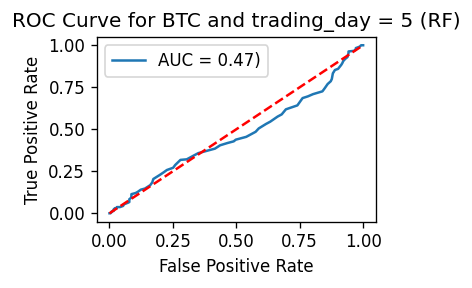

### 📊 Résultats (RF): Moyenne, Variance et Écart-Type (crypto = ETH, Trading Day = 5)

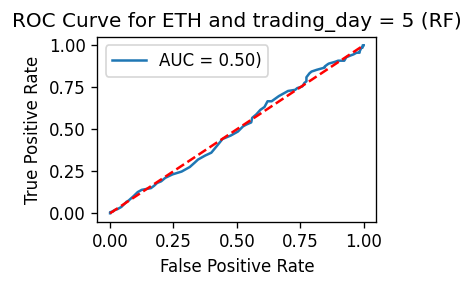

### 📊 Résultats (RF): Moyenne, Variance et Écart-Type (crypto = XRP, Trading Day = 5)

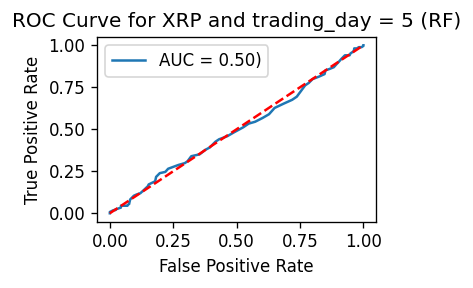

### 📊 Résultats (RF): Moyenne, Variance et Écart-Type (crypto = BNB, Trading Day = 5)

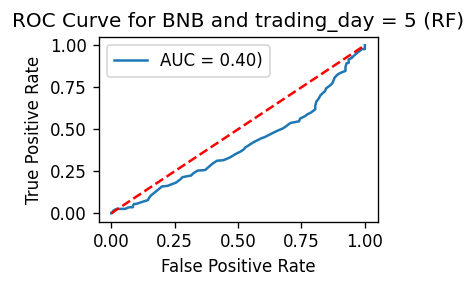

### 📊 Résultats (RF): Moyenne, Variance et Écart-Type (crypto = SOL, Trading Day = 5)

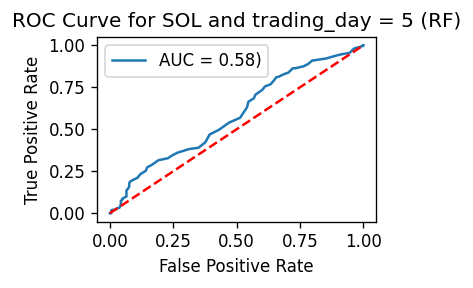

### 📊 Résultats (RF): Moyenne, Variance et Écart-Type (crypto = LINK, Trading Day = 5)

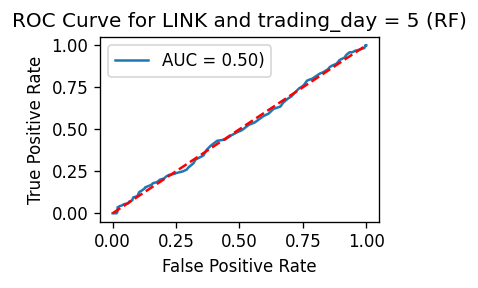

### 📊 Résultats (RF): Moyenne, Variance et Écart-Type (crypto = BTC, Trading Day = 10)

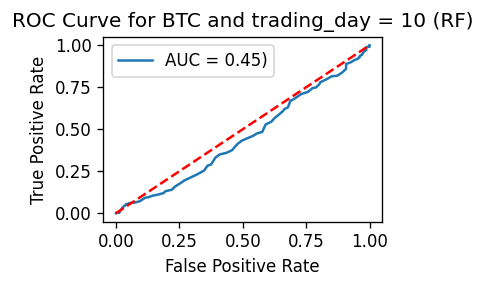

### 📊 Résultats (RF): Moyenne, Variance et Écart-Type (crypto = ETH, Trading Day = 10)

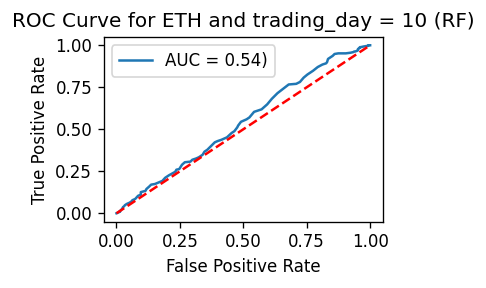

### 📊 Résultats (RF): Moyenne, Variance et Écart-Type (crypto = XRP, Trading Day = 10)

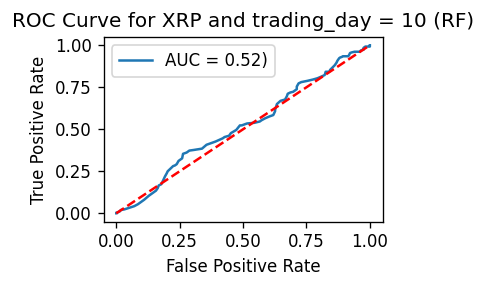

### 📊 Résultats (RF): Moyenne, Variance et Écart-Type (crypto = BNB, Trading Day = 10)

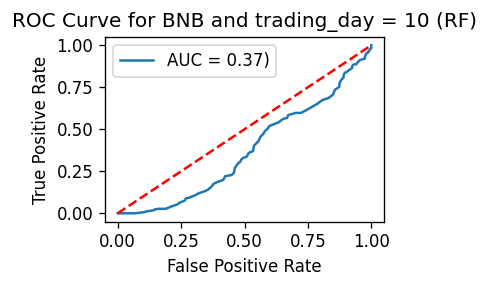

### 📊 Résultats (RF): Moyenne, Variance et Écart-Type (crypto = SOL, Trading Day = 10)

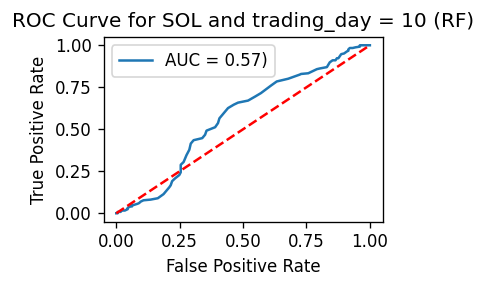

### 📊 Résultats (RF): Moyenne, Variance et Écart-Type (crypto = LINK, Trading Day = 10)

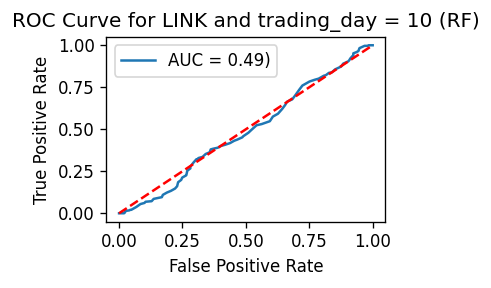

### 📊 Résultats (RF): Moyenne, Variance et Écart-Type (crypto = BTC, Trading Day = 25)

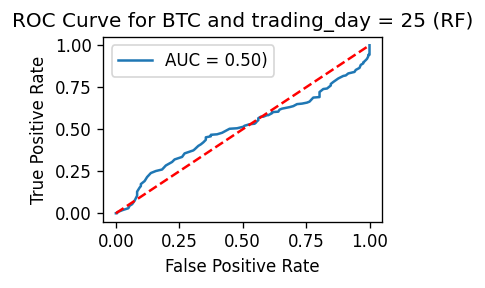

### 📊 Résultats (RF): Moyenne, Variance et Écart-Type (crypto = ETH, Trading Day = 25)

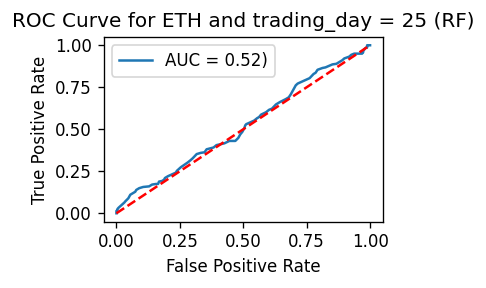

### 📊 Résultats (RF): Moyenne, Variance et Écart-Type (crypto = XRP, Trading Day = 25)

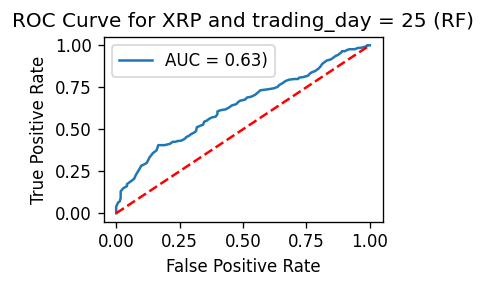

### 📊 Résultats (RF): Moyenne, Variance et Écart-Type (crypto = BNB, Trading Day = 25)

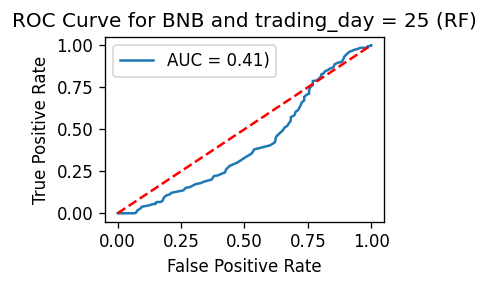

### 📊 Résultats (RF): Moyenne, Variance et Écart-Type (crypto = SOL, Trading Day = 25)

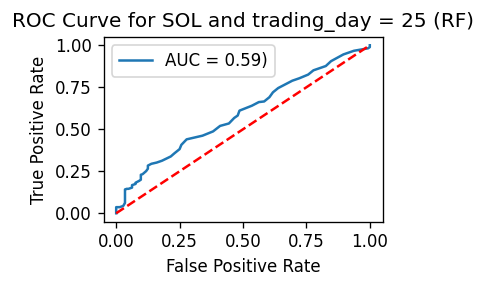

### 📊 Résultats (RF): Moyenne, Variance et Écart-Type (crypto = LINK, Trading Day = 25)

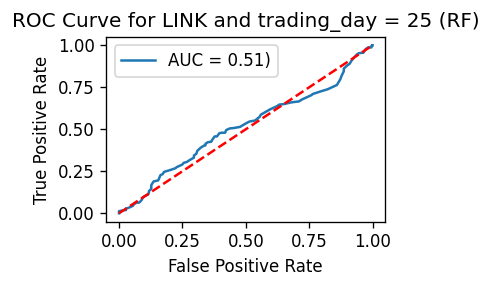

### 📊 Résultats (RF): Moyenne, Variance et Écart-Type (crypto = BTC, Trading Day = 50)

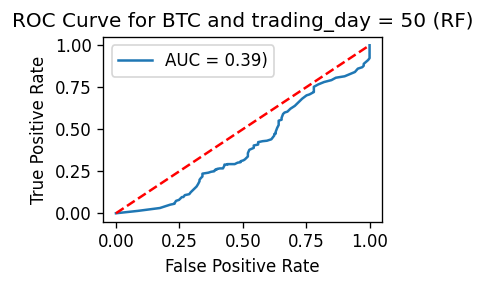

### 📊 Résultats (RF): Moyenne, Variance et Écart-Type (crypto = ETH, Trading Day = 50)

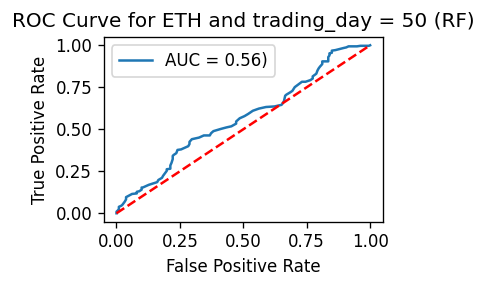

### 📊 Résultats (RF): Moyenne, Variance et Écart-Type (crypto = XRP, Trading Day = 50)

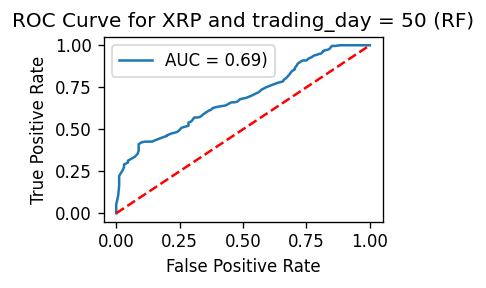

### 📊 Résultats (RF): Moyenne, Variance et Écart-Type (crypto = BNB, Trading Day = 50)

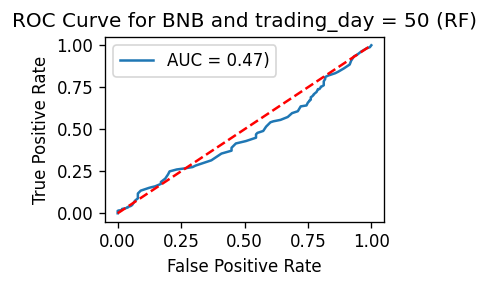

### 📊 Résultats (RF): Moyenne, Variance et Écart-Type (crypto = SOL, Trading Day = 50)

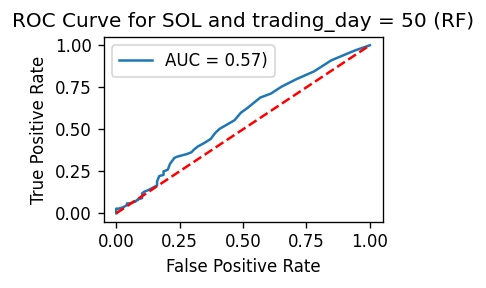

### 📊 Résultats (RF): Moyenne, Variance et Écart-Type (crypto = LINK, Trading Day = 50)

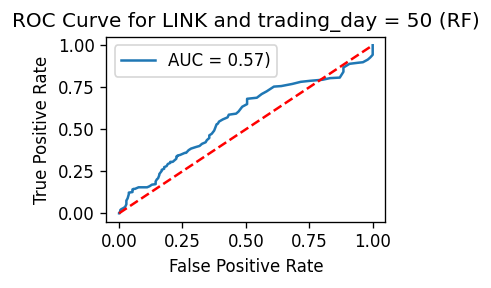

### 📊 Résultats (RF): Moyenne, Variance et Écart-Type (crypto = BTC, Trading Day = 75)

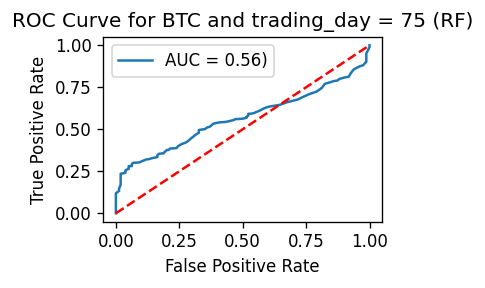

### 📊 Résultats (RF): Moyenne, Variance et Écart-Type (crypto = ETH, Trading Day = 75)

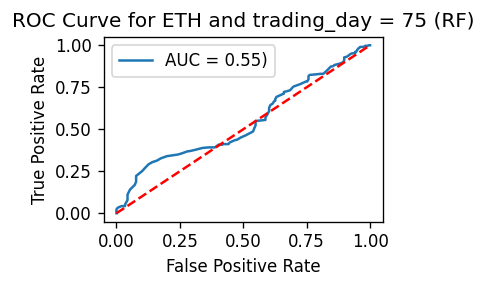

### 📊 Résultats (RF): Moyenne, Variance et Écart-Type (crypto = XRP, Trading Day = 75)

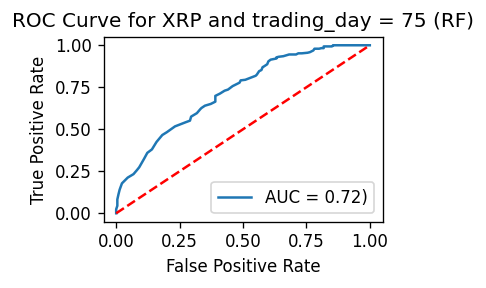

### 📊 Résultats (RF): Moyenne, Variance et Écart-Type (crypto = BNB, Trading Day = 75)

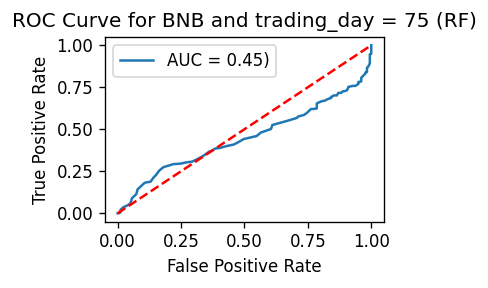

### 📊 Résultats (RF): Moyenne, Variance et Écart-Type (crypto = SOL, Trading Day = 75)

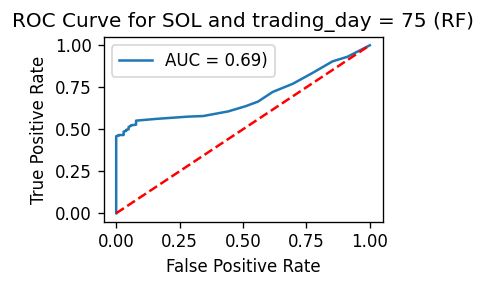

### 📊 Résultats (RF): Moyenne, Variance et Écart-Type (crypto = LINK, Trading Day = 75)

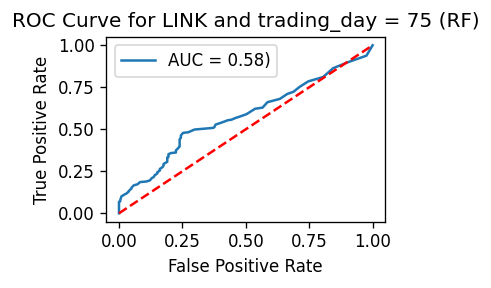

### 📊 Résultats (RF): Moyenne, Variance et Écart-Type (crypto = BTC, Trading Day = 100)

### 📊 Résultats (RF): Moyenne, Variance et Écart-Type (crypto = ETH, Trading Day = 100)

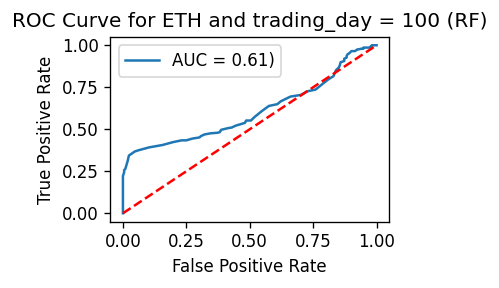

### 📊 Résultats (RF): Moyenne, Variance et Écart-Type (crypto = XRP, Trading Day = 100)

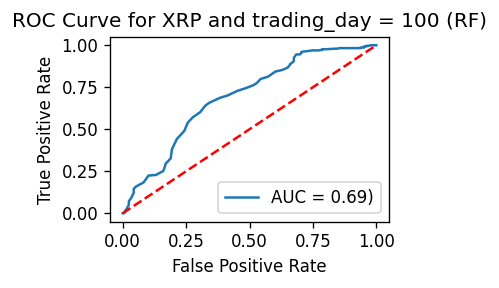

### 📊 Résultats (RF): Moyenne, Variance et Écart-Type (crypto = BNB, Trading Day = 100)

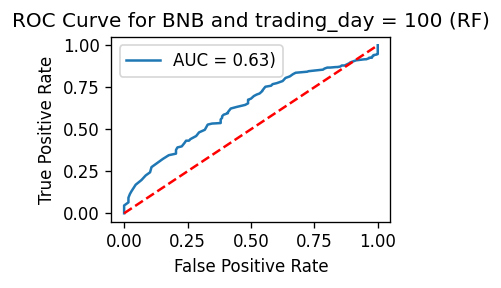

### 📊 Résultats (RF): Moyenne, Variance et Écart-Type (crypto = SOL, Trading Day = 100)

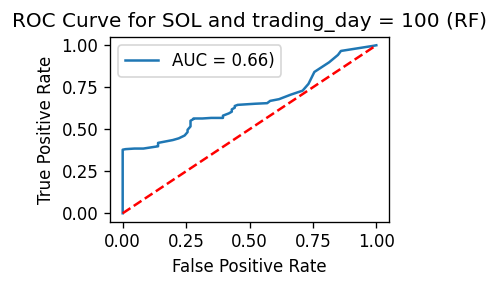

### 📊 Résultats (RF): Moyenne, Variance et Écart-Type (crypto = LINK, Trading Day = 100)

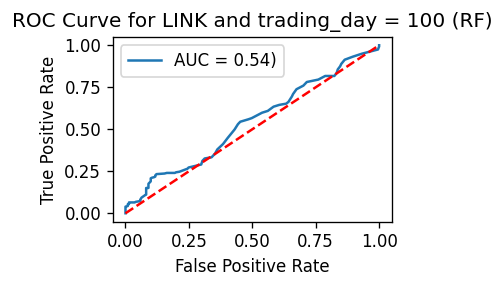

### 📊 Résultats (RF): Moyenne, Variance et Écart-Type (crypto = BTC, Trading Day = 125)

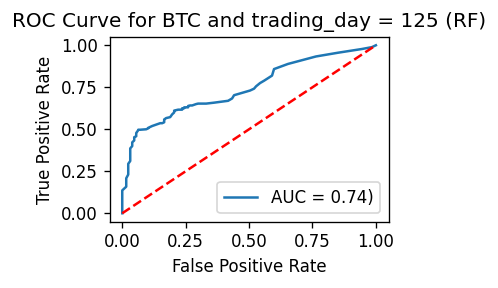

### 📊 Résultats (RF): Moyenne, Variance et Écart-Type (crypto = ETH, Trading Day = 125)

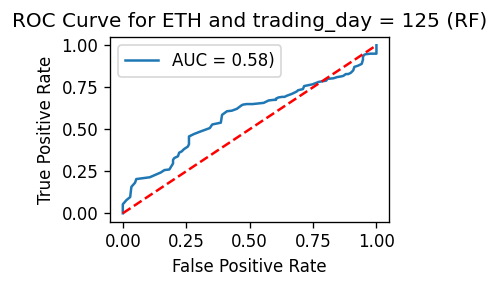

### 📊 Résultats (RF): Moyenne, Variance et Écart-Type (crypto = XRP, Trading Day = 125)

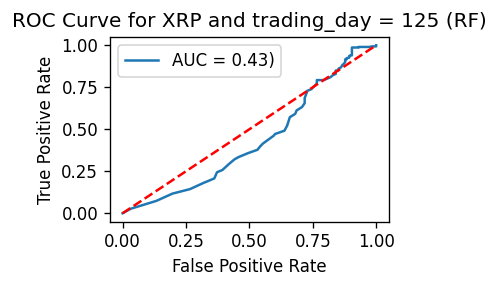

### 📊 Résultats (RF): Moyenne, Variance et Écart-Type (crypto = BNB, Trading Day = 125)

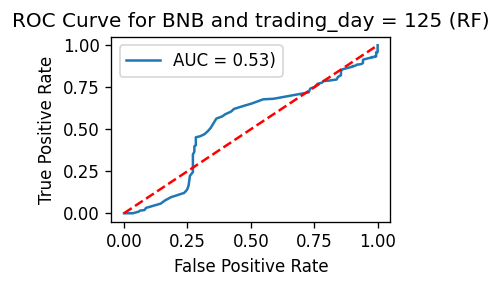

### 📊 Résultats (RF): Moyenne, Variance et Écart-Type (crypto = SOL, Trading Day = 125)

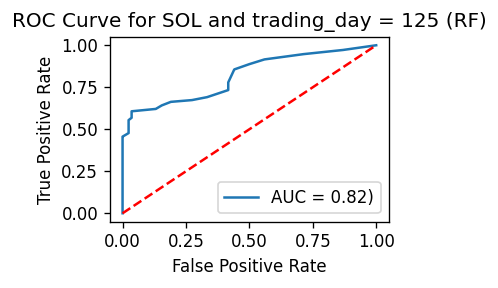

### 📊 Résultats (RF): Moyenne, Variance et Écart-Type (crypto = LINK, Trading Day = 125)

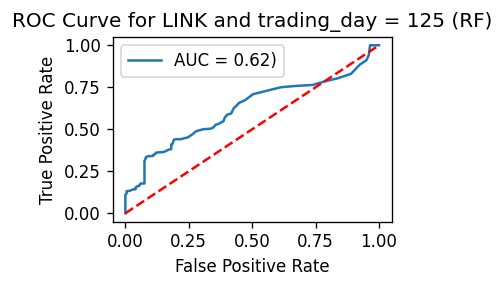

### 📊 Résultats (RF): Moyenne, Variance et Écart-Type (crypto = BTC, Trading Day = 150)

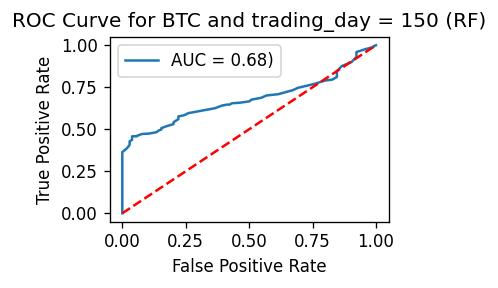

### 📊 Résultats (RF): Moyenne, Variance et Écart-Type (crypto = ETH, Trading Day = 150)

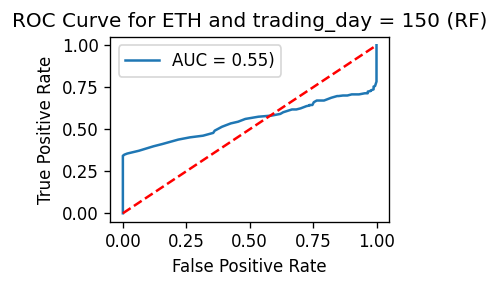

### 📊 Résultats (RF): Moyenne, Variance et Écart-Type (crypto = XRP, Trading Day = 150)

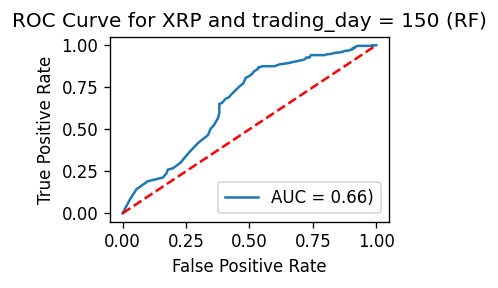

### 📊 Résultats (RF): Moyenne, Variance et Écart-Type (crypto = BNB, Trading Day = 150)

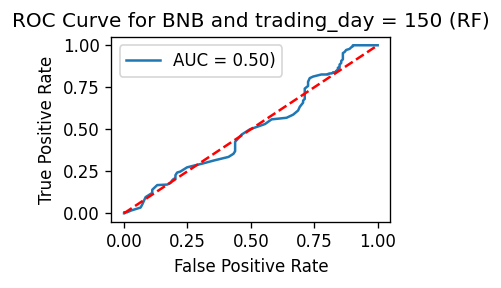

### 📊 Résultats (RF): Moyenne, Variance et Écart-Type (crypto = SOL, Trading Day = 150)

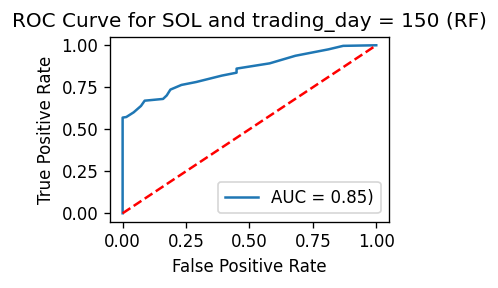

### 📊 Résultats (RF): Moyenne, Variance et Écart-Type (crypto = LINK, Trading Day = 150)

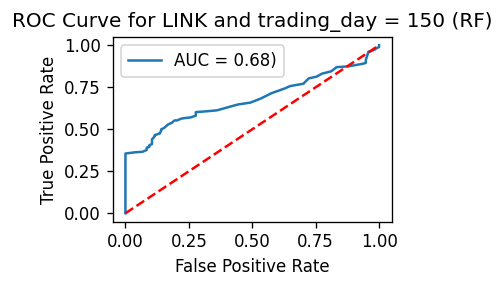

### 📊 Résultats (RF): Moyenne, Variance et Écart-Type (crypto = BTC, Trading Day = 175)

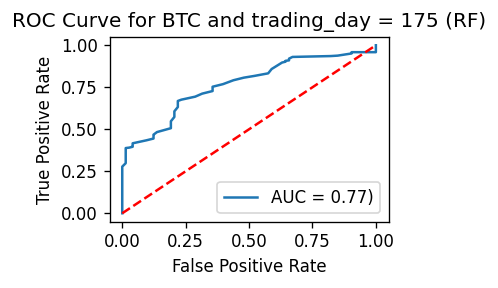

### 📊 Résultats (RF): Moyenne, Variance et Écart-Type (crypto = ETH, Trading Day = 175)

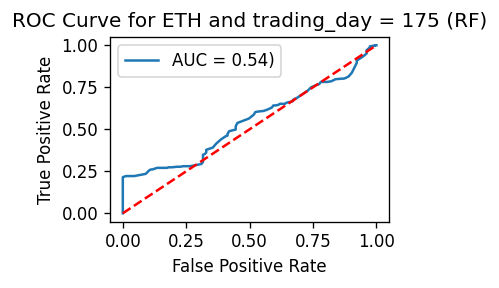

### 📊 Résultats (RF): Moyenne, Variance et Écart-Type (crypto = XRP, Trading Day = 175)

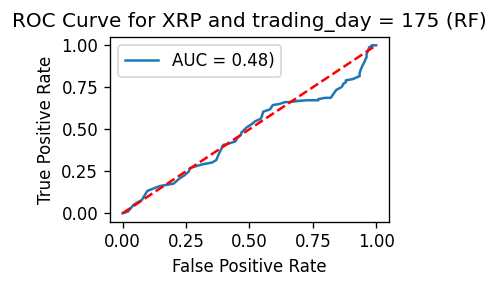

### 📊 Résultats (RF): Moyenne, Variance et Écart-Type (crypto = BNB, Trading Day = 175)

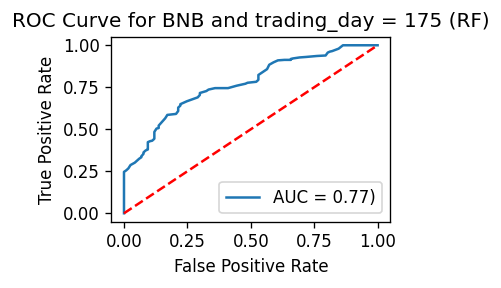

### 📊 Résultats (RF): Moyenne, Variance et Écart-Type (crypto = SOL, Trading Day = 175)

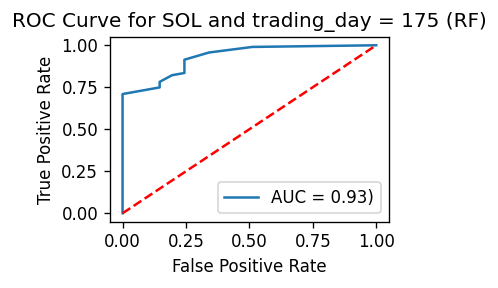

### 📊 Résultats (RF): Moyenne, Variance et Écart-Type (crypto = LINK, Trading Day = 175)

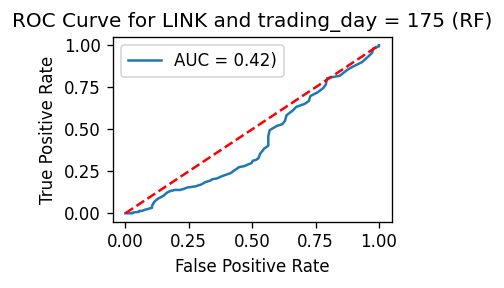

### 📊 Résultats (RF): Moyenne, Variance et Écart-Type (crypto = BTC, Trading Day = 200)

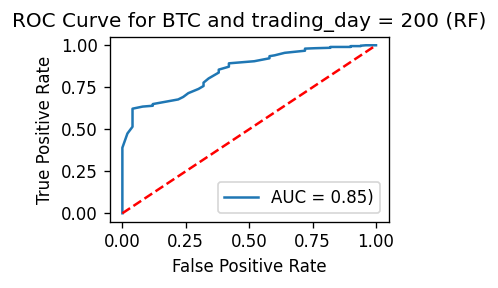

### 📊 Résultats (RF): Moyenne, Variance et Écart-Type (crypto = ETH, Trading Day = 200)

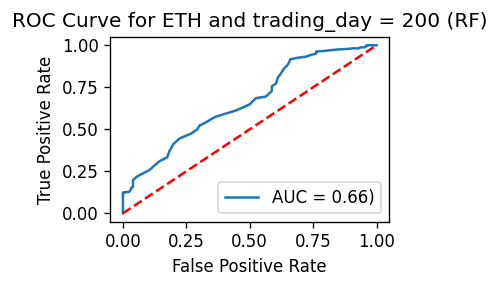

### 📊 Résultats (RF): Moyenne, Variance et Écart-Type (crypto = XRP, Trading Day = 200)

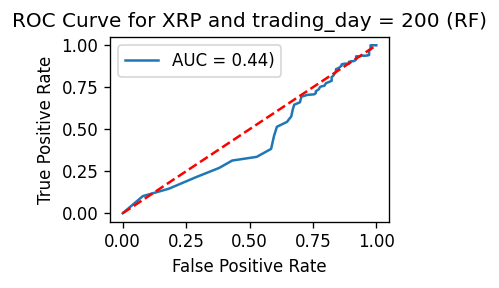

### 📊 Résultats (RF): Moyenne, Variance et Écart-Type (crypto = BNB, Trading Day = 200)

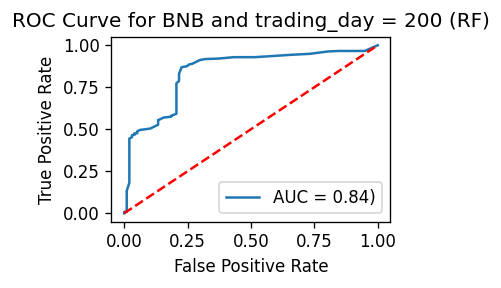

### 📊 Résultats (RF): Moyenne, Variance et Écart-Type (crypto = SOL, Trading Day = 200)

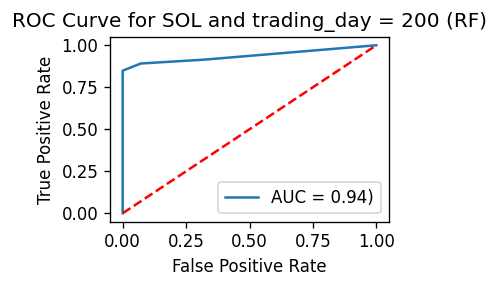

### 📊 Résultats (RF): Moyenne, Variance et Écart-Type (crypto = LINK, Trading Day = 200)

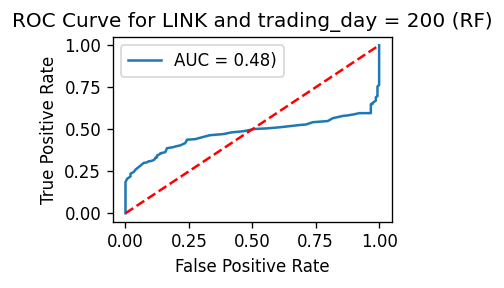

### 📊 Résultats (RF): Moyenne, Variance et Écart-Type (crypto = BTC, Trading Day = 225)

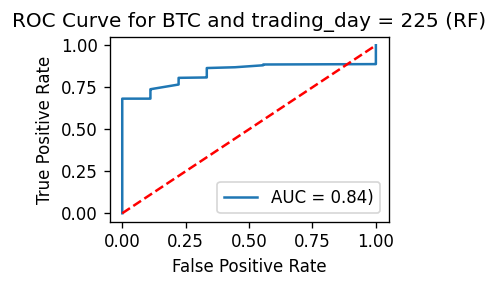

### 📊 Résultats (RF): Moyenne, Variance et Écart-Type (crypto = ETH, Trading Day = 225)

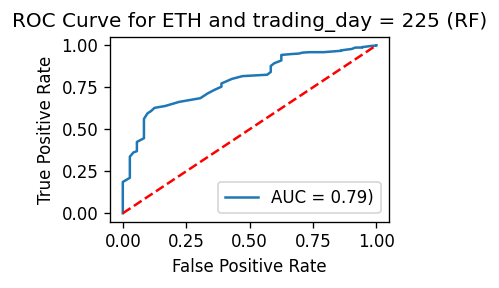

### 📊 Résultats (RF): Moyenne, Variance et Écart-Type (crypto = XRP, Trading Day = 225)

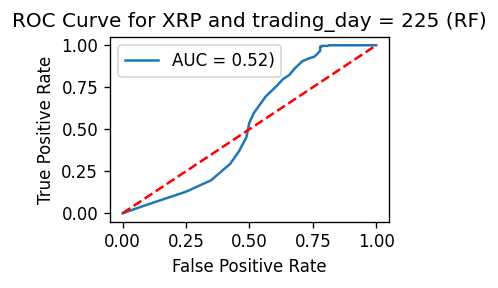

### 📊 Résultats (RF): Moyenne, Variance et Écart-Type (crypto = BNB, Trading Day = 225)

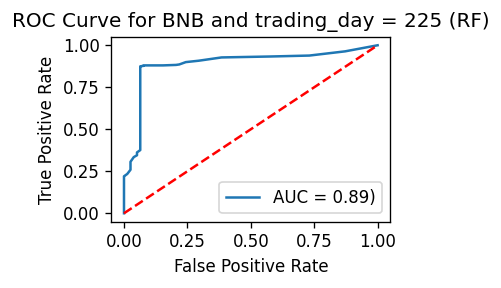

### 📊 Résultats (RF): Moyenne, Variance et Écart-Type (crypto = SOL, Trading Day = 225)

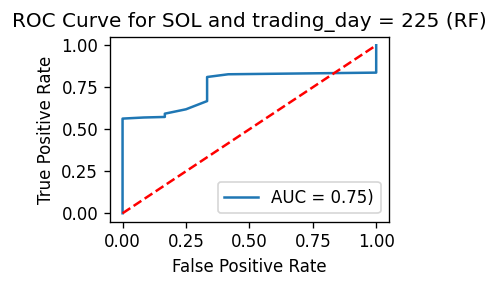

### 📊 Résultats (RF): Moyenne, Variance et Écart-Type (crypto = LINK, Trading Day = 225)

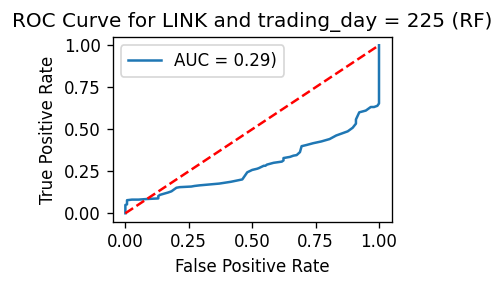

### 📊 Résultats (RF): Moyenne, Variance et Écart-Type (crypto = BTC, Trading Day = 250)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1179: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


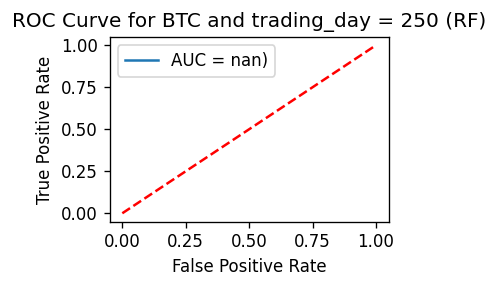

### 📊 Résultats (RF): Moyenne, Variance et Écart-Type (crypto = ETH, Trading Day = 250)

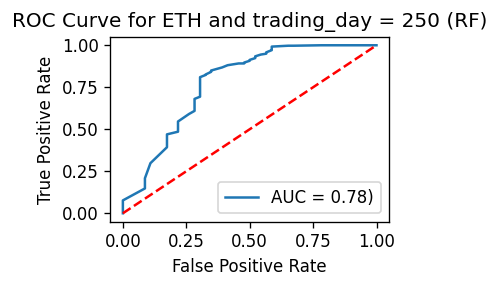

### 📊 Résultats (RF): Moyenne, Variance et Écart-Type (crypto = XRP, Trading Day = 250)

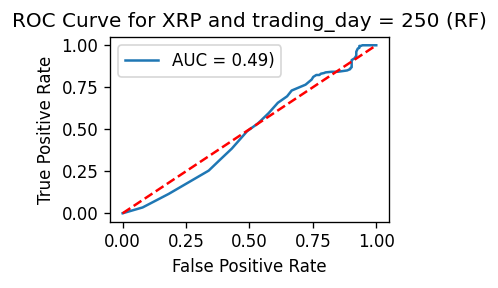

### 📊 Résultats (RF): Moyenne, Variance et Écart-Type (crypto = BNB, Trading Day = 250)

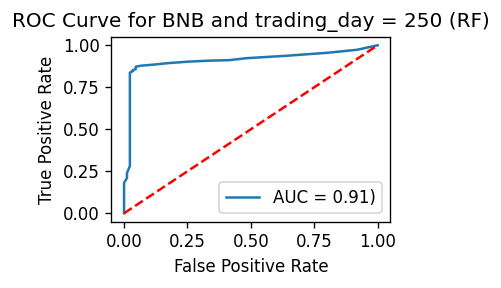

### 📊 Résultats (RF): Moyenne, Variance et Écart-Type (crypto = SOL, Trading Day = 250)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1179: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


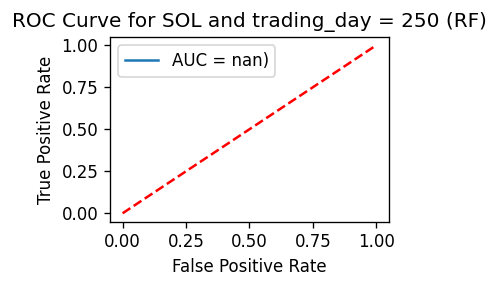

### 📊 Résultats (RF): Moyenne, Variance et Écart-Type (crypto = LINK, Trading Day = 250)

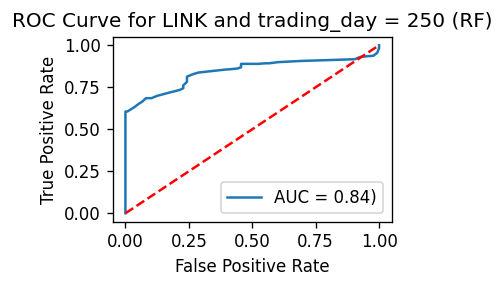

In [41]:
def pipeline_crypto(crypto, crypto_dataframes, trading_day):
    """
    Pipeline complet pour le traitement des données et la modélisation d'une crypto-monnaie.

    Paramètres :
    crypto : str
        Nom de la crypto-monnaie.
    crypto_dataframes : dict
        Dictionnaire des DataFrames de crypto-monnaies.
    trading_day : int
        Nombre de jours de trading utilisés pour la préparation des données.

    Retour :
    None
    """

    print(f"Traitement des données pour {crypto}")

    # Étape 1: Chargement des données
    ohclv_data, close, date = getData(crypto, crypto_dataframes)
    ohclv_data = np.array(ohclv_data)

    # Étape 2: Préparation des données
    X, y, xplot, closeplot, dateplot = prepareData(ohclv_data, close, date, trading_day)

    # Vérification des classes uniques dans y
    print(f"Classes uniques dans y avant traitement: {np.unique(y)}")

    # Correction des valeurs 0 dans y pour éviter des erreurs
    y[y == 0] = 1

    print(f"Données préparées pour {crypto}, X shape: {X.shape}, y shape: {y.shape}")

    # Affichage des premières lignes des données préparées
    print(f"\nAperçu des 10 premières lignes de X pour {crypto}:")
    print(X[:10])
    print(f"\nAperçu des 10 premières valeurs de y pour {crypto}:")
    print(y[:10])

    # Étape 3: Division des données en ensembles train/test
    indices = np.arange(len(X))  # Création des indices pour suivre les échantillons
    X_train, X_test, y_train, y_test, train_indices, test_indices = train_test_split(
        X, y, indices, shuffle=False, random_state=42
    )

    # Affichage des tailles des ensembles
    print(f"\nTaille des données après split pour {crypto}:")
    print(f"- Taille de X_train : {X_train.shape}")
    print(f"- Taille de X_test  : {X_test.shape}")
    print(f"- Taille de y_train : {y_train.shape}")
    print(f"- Taille de y_test  : {y_test.shape}")

    ####################################################################

    # Calcul de la variance, écart-type et moyenne sur X_train et X_test
    variance_train = np.var(X_train, axis=0)
    ecart_type_train = np.std(X_train, axis=0)
    moyenne_train = np.mean(X_train, axis=0)

    variance_test = np.var(X_test, axis=0)
    ecart_type_test = np.std(X_test, axis=0)
    moyenne_test = np.mean(X_test, axis=0)

    # Création du DataFrame pour afficher les résultats
    df_results = pd.DataFrame({
        "Feature": [f"Feature {i}" for i in range(X_train.shape[1])],
        "Moyenne (Train)": moyenne_train,
        "Variance (Train)": variance_train,
        "Écart-Type (Train)": ecart_type_train,
        "Moyenne (Test)": moyenne_test,
        "Variance (Test)": variance_test,
        "Écart-Type (Test)": ecart_type_test
    })

    # 🔹 Conversion en format sans notation scientifique avec 6 décimales
    df_results = df_results.style.format(precision=3)

    # Création du titre dynamique
    titre_markdown = f"### 📊 Résultats (RF): Moyenne, Variance et Écart-Type (crypto = {crypto}, Trading Day = {trading_day})"

    # Affichage du titre et du tableau
    display(Markdown(titre_markdown))
    display(df_results)

    ####################################################################

    # Affichage des indices des ensembles d'entraînement et de test
    print(f"\nIndices des données de 'train' pour {crypto}:")
    print(train_indices)
    print(f"\nIndices des données de 'test' pour {crypto}:")
    print(test_indices)

    # Comptage des classes dans les ensembles
    train_counts = Counter(y_train)
    test_counts = Counter(y_test)

    print(f"\nDistribution des étiquettes dans y_train pour {crypto}:")
    print(f"Nombre de +1: {train_counts[1]}, Nombre de -1: {train_counts[-1]}")
    print(f"\nDistribution des étiquettes dans y_test pour {crypto}:")
    print(f"Nombre de +1: {test_counts[1]}, Nombre de -1: {test_counts[-1]}")

    ####################################################################

    # Étape 4: Modélisation avec RandomForest
    model = RandomForestClassifier(n_estimators=100, criterion="gini", random_state=42)

    # Évaluation par validation croisée
    scores = cross_val_score(model, X_train, y_train, cv=5)

    print("\nCross Validation scores:")
    for i, score in enumerate(scores):
        print(f"Validation Set {i} score: {score:.4f}")

    # Entraînement du modèle
    model.fit(X_train, y_train)

    # Prédiction sur l'ensemble de test
    y_pred = model.predict(X_test)

    ####################################################################

    # Étape 5: Évaluation des performances
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    specificity = recall_score(y_test, y_pred, pos_label=-1)

    print("\nRésultats sur 'test':")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall (Sensitivity): {recall:.4f}")
    print(f"Specificity: {specificity:.4f}")

    # Étape 6: Tracé de la courbe ROC + plotClassificationResult
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=1)
    # auc_score = auc(fpr, tpr)

    if len(np.unique(y_test)) < 2:
        print(f"Attention: y_test ne contient qu'une seule classe, impossible de calculer AUC.")
        auc_score = np.nan
    else:
        if np.unique(y_prob).size == 1:
            print("Attention: y_prob contient une seule valeur, courbe ROC invalide.")
            auc_score = np.nan
        else:
            fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=1)
            auc_score = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f})")
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {crypto} and trading_day = {trading_day} (RF)')
    plt.legend()
    plt.show()

    #plotClassificationResult(y_test, y_pred)

##############################################################################

# import sys
# import io

# # Désactiver temporairement print()
# sys.stdout = io.StringIO()

# Définir une taille globale plus petite pour toutes les figures
plt.rcParams['figure.figsize'] = (3, 2)
plt.rcParams['figure.dpi'] = 120

# cryptos
cryptos = ["BTC", "ETH", "XRP", "BNB", "SOL", "LINK"]

# Trading_Days
Trading_Days = [5, 10, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250]

# Exécuter le pipeline sans afficher print()
for Trading_Day in Trading_Days:
    for crypto in cryptos:
        pipeline_crypto(crypto, crypto_dataframes, Trading_Day)
        plt.show()

# # Réactiver print() pour affichage normal
# sys.stdout = sys.__stdout__

## XGBClassifier

### 📊 Résultats (XGB) : Moyenne, Variance et Écart-Type (crypto = BTC, Trading Day = 5)

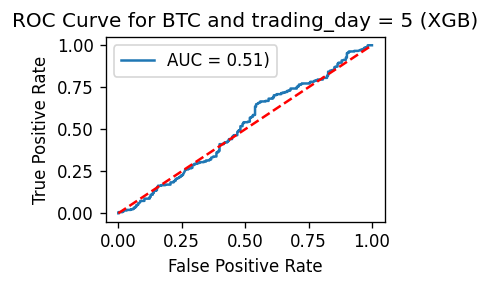

### 📊 Résultats (XGB) : Moyenne, Variance et Écart-Type (crypto = ETH, Trading Day = 5)

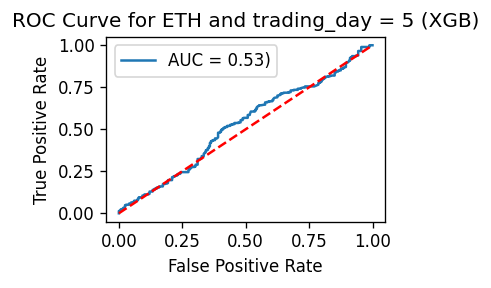

### 📊 Résultats (XGB) : Moyenne, Variance et Écart-Type (crypto = XRP, Trading Day = 5)

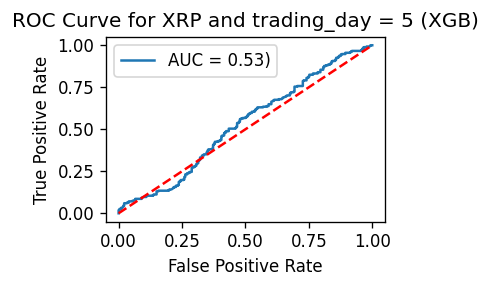

### 📊 Résultats (XGB) : Moyenne, Variance et Écart-Type (crypto = BNB, Trading Day = 5)

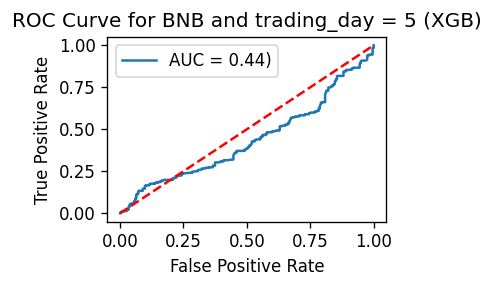

### 📊 Résultats (XGB) : Moyenne, Variance et Écart-Type (crypto = SOL, Trading Day = 5)

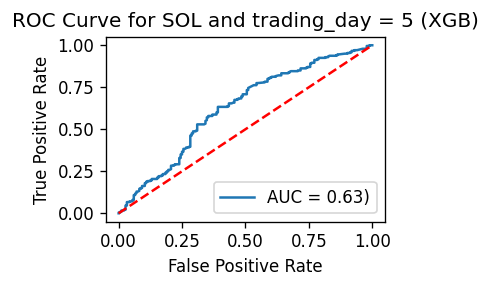

### 📊 Résultats (XGB) : Moyenne, Variance et Écart-Type (crypto = LINK, Trading Day = 5)

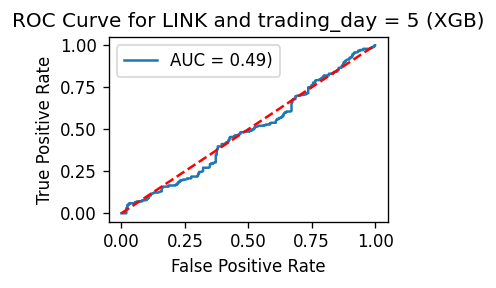

### 📊 Résultats (XGB) : Moyenne, Variance et Écart-Type (crypto = BTC, Trading Day = 10)

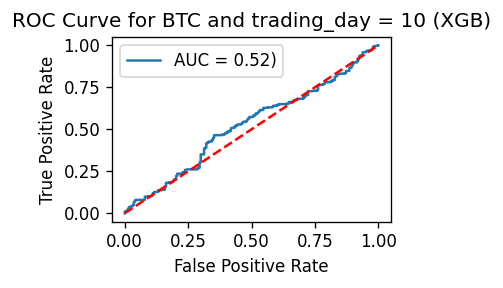

### 📊 Résultats (XGB) : Moyenne, Variance et Écart-Type (crypto = ETH, Trading Day = 10)

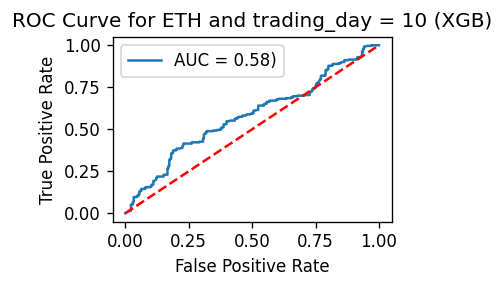

### 📊 Résultats (XGB) : Moyenne, Variance et Écart-Type (crypto = XRP, Trading Day = 10)

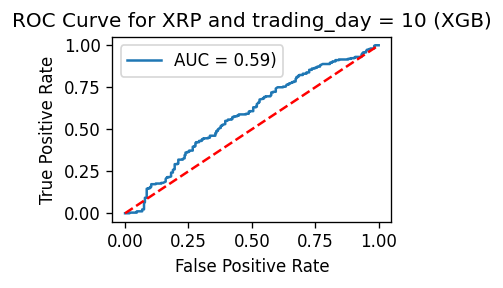

### 📊 Résultats (XGB) : Moyenne, Variance et Écart-Type (crypto = BNB, Trading Day = 10)

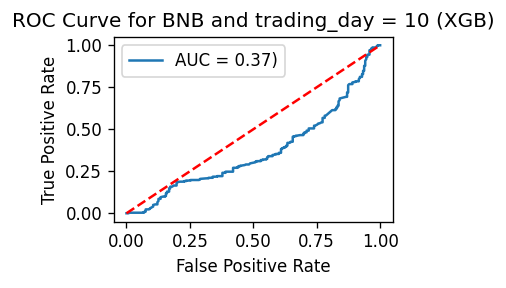

### 📊 Résultats (XGB) : Moyenne, Variance et Écart-Type (crypto = SOL, Trading Day = 10)

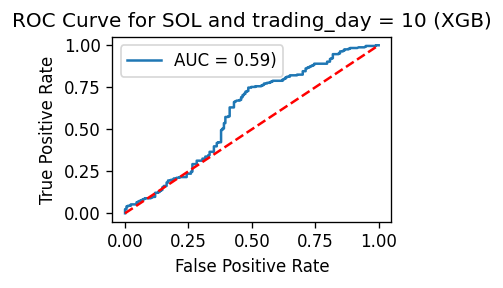

### 📊 Résultats (XGB) : Moyenne, Variance et Écart-Type (crypto = LINK, Trading Day = 10)

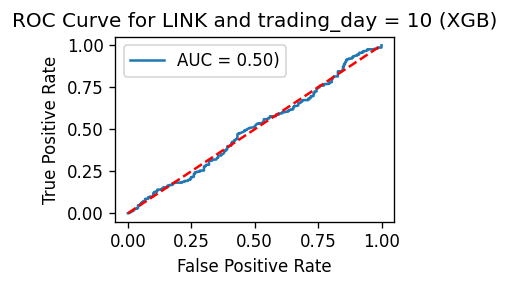

### 📊 Résultats (XGB) : Moyenne, Variance et Écart-Type (crypto = BTC, Trading Day = 25)

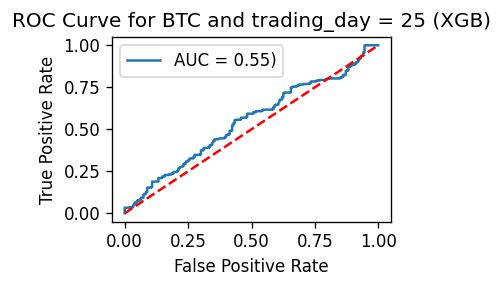

### 📊 Résultats (XGB) : Moyenne, Variance et Écart-Type (crypto = ETH, Trading Day = 25)

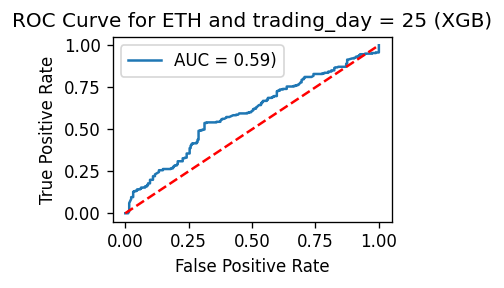

### 📊 Résultats (XGB) : Moyenne, Variance et Écart-Type (crypto = XRP, Trading Day = 25)

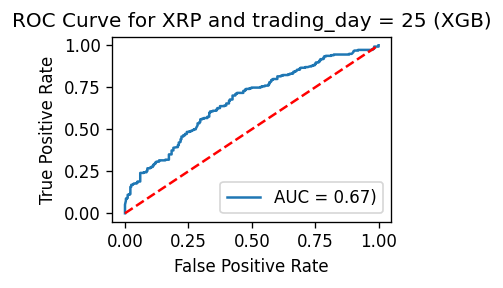

### 📊 Résultats (XGB) : Moyenne, Variance et Écart-Type (crypto = BNB, Trading Day = 25)

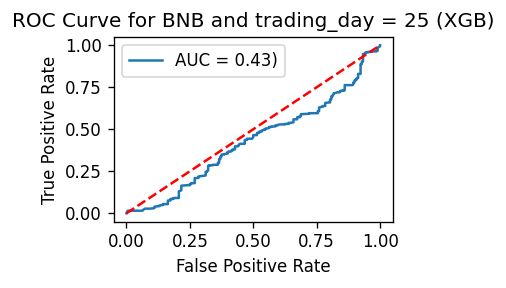

### 📊 Résultats (XGB) : Moyenne, Variance et Écart-Type (crypto = SOL, Trading Day = 25)

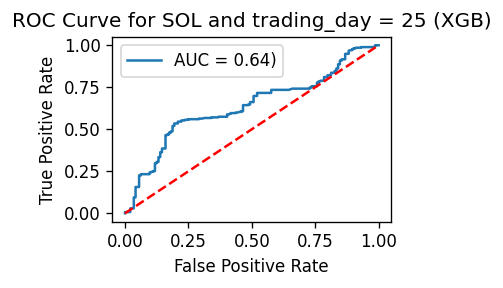

### 📊 Résultats (XGB) : Moyenne, Variance et Écart-Type (crypto = LINK, Trading Day = 25)

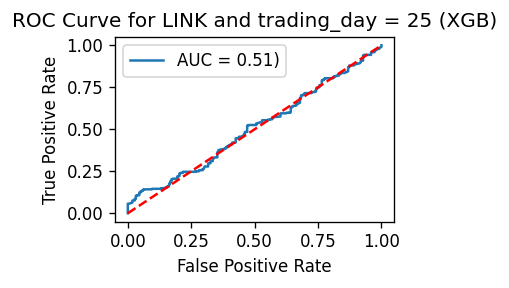

### 📊 Résultats (XGB) : Moyenne, Variance et Écart-Type (crypto = BTC, Trading Day = 50)

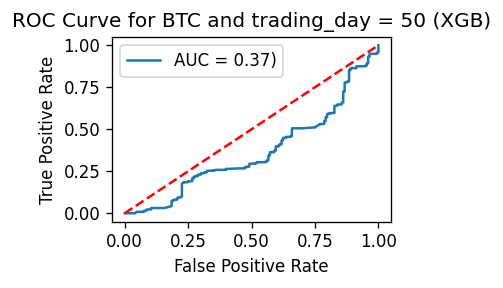

### 📊 Résultats (XGB) : Moyenne, Variance et Écart-Type (crypto = ETH, Trading Day = 50)

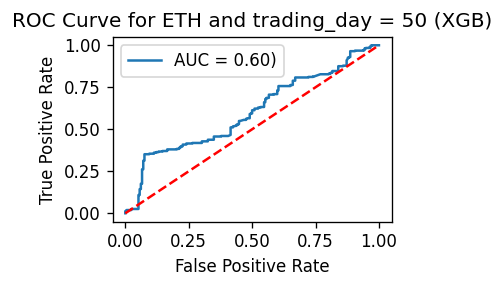

### 📊 Résultats (XGB) : Moyenne, Variance et Écart-Type (crypto = XRP, Trading Day = 50)

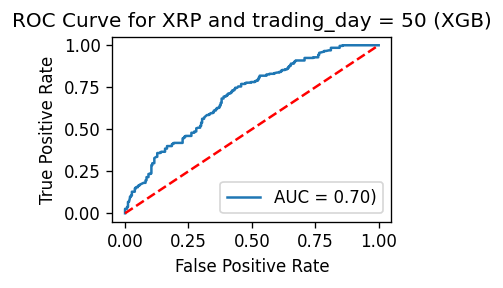

### 📊 Résultats (XGB) : Moyenne, Variance et Écart-Type (crypto = BNB, Trading Day = 50)

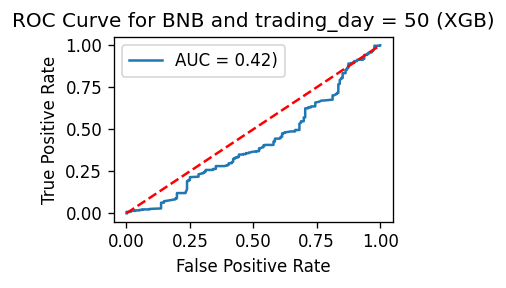

### 📊 Résultats (XGB) : Moyenne, Variance et Écart-Type (crypto = SOL, Trading Day = 50)

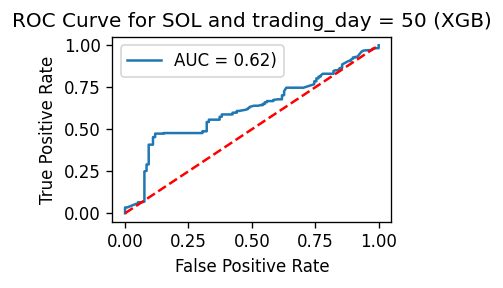

### 📊 Résultats (XGB) : Moyenne, Variance et Écart-Type (crypto = LINK, Trading Day = 50)

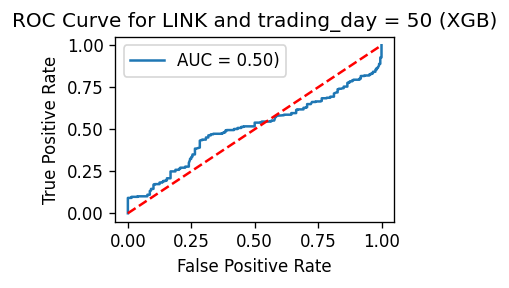

### 📊 Résultats (XGB) : Moyenne, Variance et Écart-Type (crypto = BTC, Trading Day = 75)

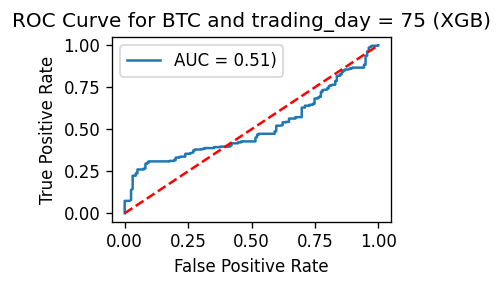

### 📊 Résultats (XGB) : Moyenne, Variance et Écart-Type (crypto = ETH, Trading Day = 75)

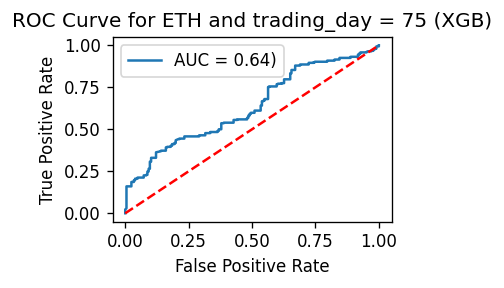

### 📊 Résultats (XGB) : Moyenne, Variance et Écart-Type (crypto = XRP, Trading Day = 75)

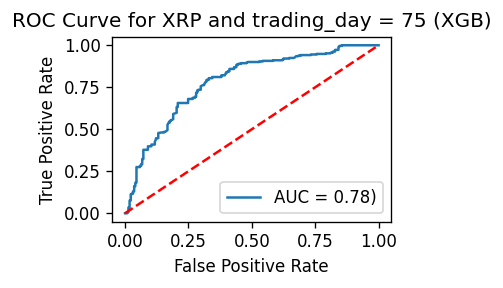

### 📊 Résultats (XGB) : Moyenne, Variance et Écart-Type (crypto = BNB, Trading Day = 75)

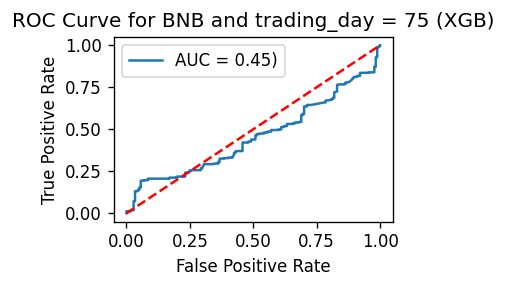

### 📊 Résultats (XGB) : Moyenne, Variance et Écart-Type (crypto = SOL, Trading Day = 75)

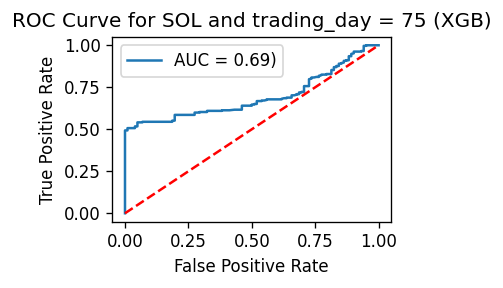

### 📊 Résultats (XGB) : Moyenne, Variance et Écart-Type (crypto = LINK, Trading Day = 75)

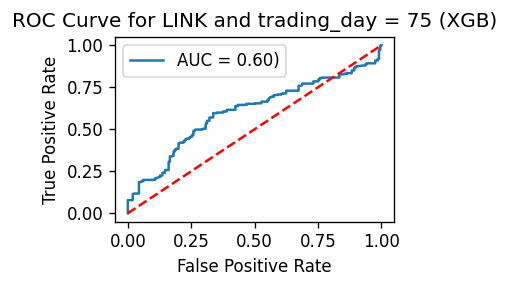

### 📊 Résultats (XGB) : Moyenne, Variance et Écart-Type (crypto = BTC, Trading Day = 100)

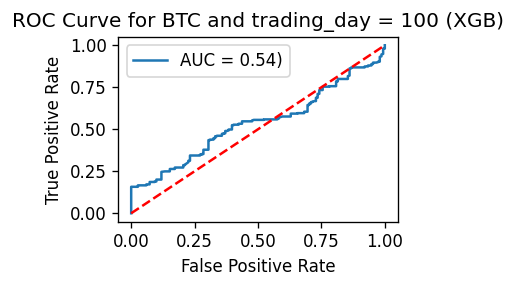

### 📊 Résultats (XGB) : Moyenne, Variance et Écart-Type (crypto = ETH, Trading Day = 100)

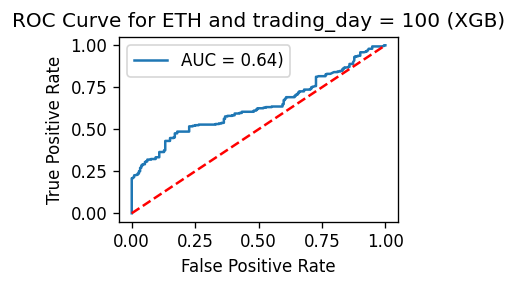

### 📊 Résultats (XGB) : Moyenne, Variance et Écart-Type (crypto = XRP, Trading Day = 100)

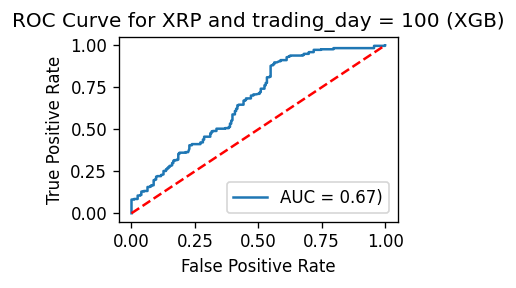

### 📊 Résultats (XGB) : Moyenne, Variance et Écart-Type (crypto = BNB, Trading Day = 100)

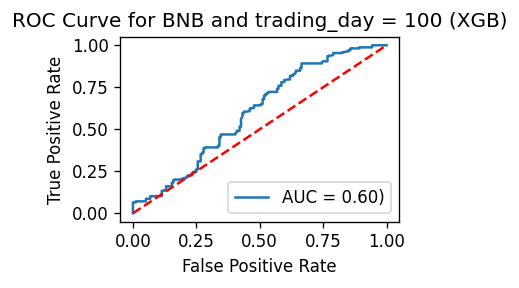

### 📊 Résultats (XGB) : Moyenne, Variance et Écart-Type (crypto = SOL, Trading Day = 100)

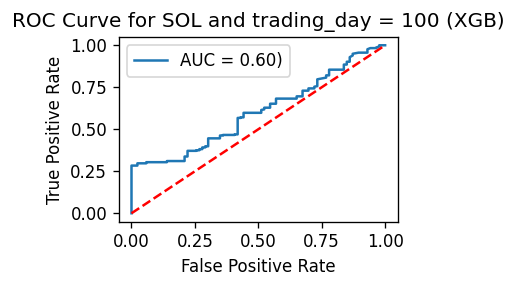

### 📊 Résultats (XGB) : Moyenne, Variance et Écart-Type (crypto = LINK, Trading Day = 100)

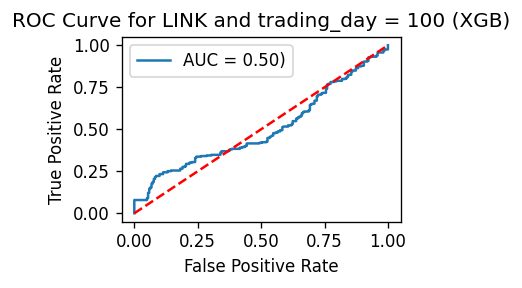

### 📊 Résultats (XGB) : Moyenne, Variance et Écart-Type (crypto = BTC, Trading Day = 125)

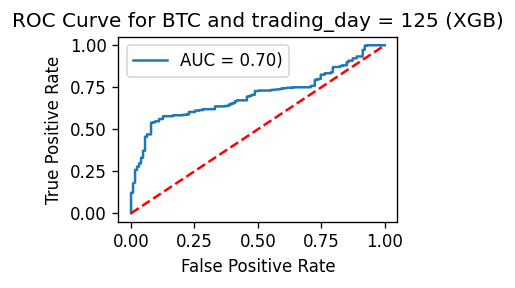

### 📊 Résultats (XGB) : Moyenne, Variance et Écart-Type (crypto = ETH, Trading Day = 125)

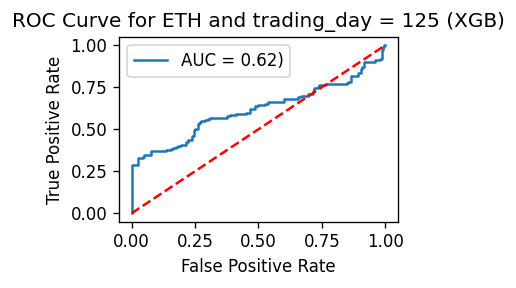

### 📊 Résultats (XGB) : Moyenne, Variance et Écart-Type (crypto = XRP, Trading Day = 125)

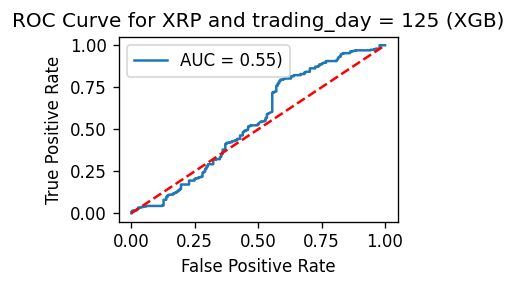

### 📊 Résultats (XGB) : Moyenne, Variance et Écart-Type (crypto = BNB, Trading Day = 125)

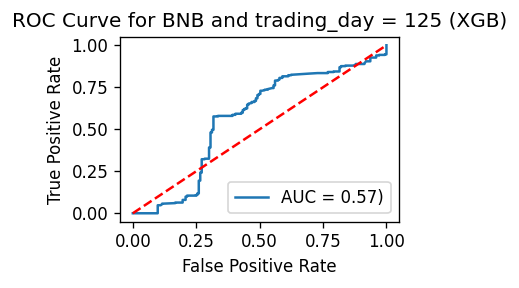

### 📊 Résultats (XGB) : Moyenne, Variance et Écart-Type (crypto = SOL, Trading Day = 125)

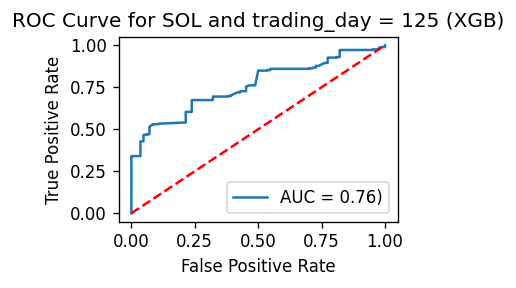

### 📊 Résultats (XGB) : Moyenne, Variance et Écart-Type (crypto = LINK, Trading Day = 125)

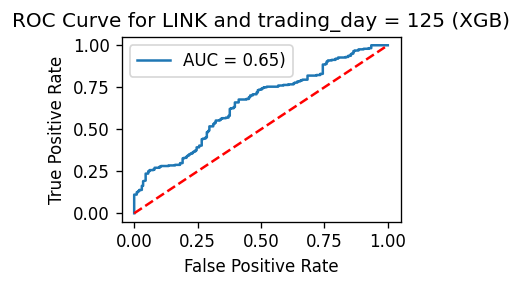

### 📊 Résultats (XGB) : Moyenne, Variance et Écart-Type (crypto = BTC, Trading Day = 150)

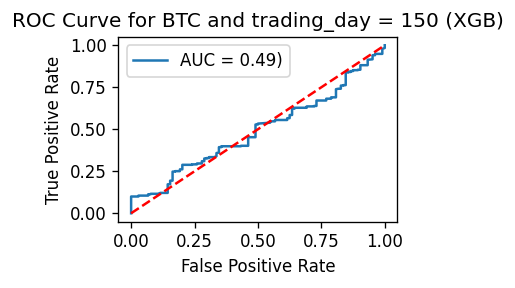

### 📊 Résultats (XGB) : Moyenne, Variance et Écart-Type (crypto = ETH, Trading Day = 150)

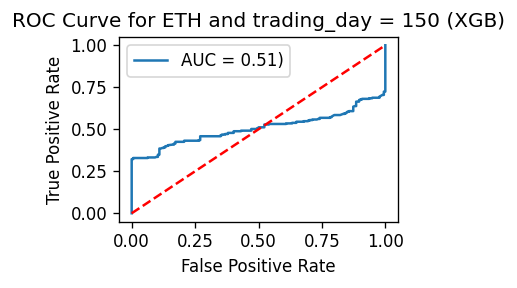

### 📊 Résultats (XGB) : Moyenne, Variance et Écart-Type (crypto = XRP, Trading Day = 150)

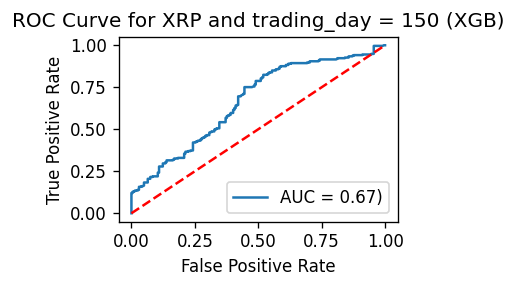

### 📊 Résultats (XGB) : Moyenne, Variance et Écart-Type (crypto = BNB, Trading Day = 150)

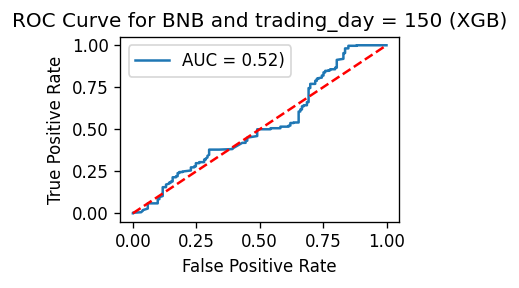

### 📊 Résultats (XGB) : Moyenne, Variance et Écart-Type (crypto = SOL, Trading Day = 150)

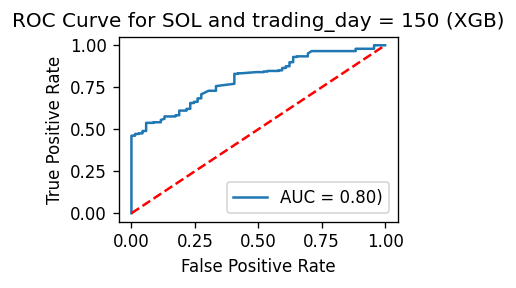

### 📊 Résultats (XGB) : Moyenne, Variance et Écart-Type (crypto = LINK, Trading Day = 150)

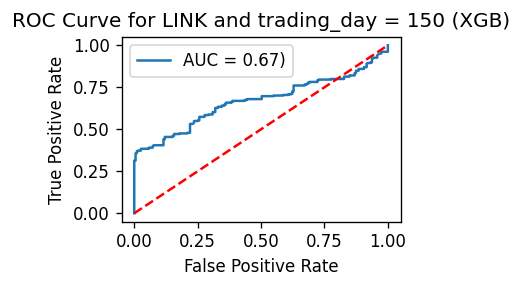

### 📊 Résultats (XGB) : Moyenne, Variance et Écart-Type (crypto = BTC, Trading Day = 175)

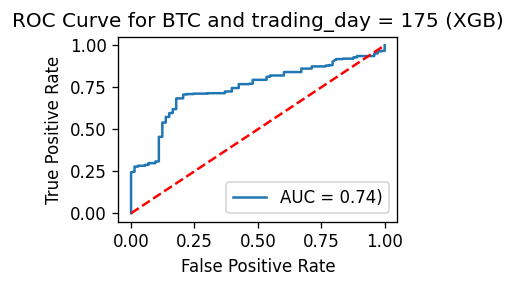

### 📊 Résultats (XGB) : Moyenne, Variance et Écart-Type (crypto = ETH, Trading Day = 175)

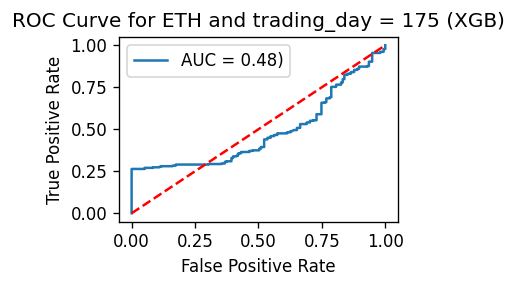

### 📊 Résultats (XGB) : Moyenne, Variance et Écart-Type (crypto = XRP, Trading Day = 175)

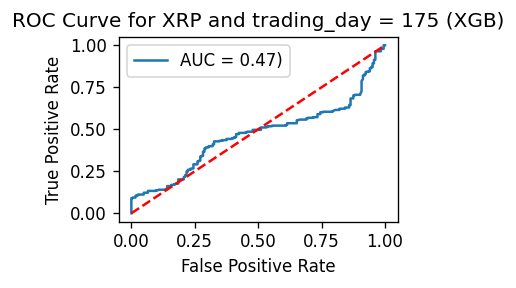

### 📊 Résultats (XGB) : Moyenne, Variance et Écart-Type (crypto = BNB, Trading Day = 175)

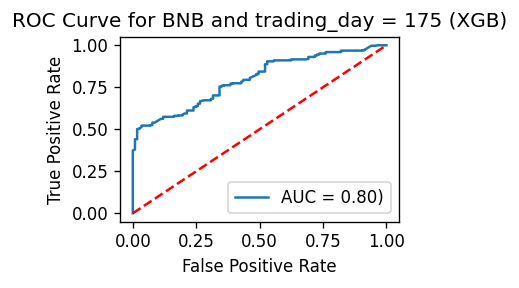

### 📊 Résultats (XGB) : Moyenne, Variance et Écart-Type (crypto = SOL, Trading Day = 175)

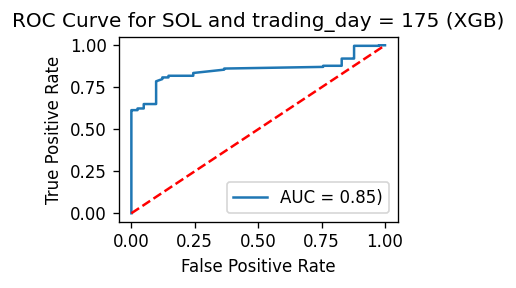

### 📊 Résultats (XGB) : Moyenne, Variance et Écart-Type (crypto = LINK, Trading Day = 175)

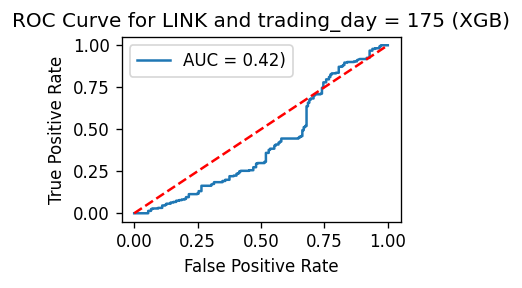

### 📊 Résultats (XGB) : Moyenne, Variance et Écart-Type (crypto = BTC, Trading Day = 200)

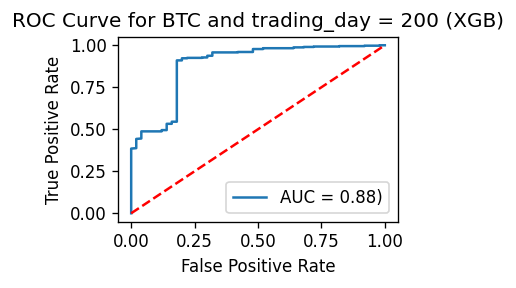

### 📊 Résultats (XGB) : Moyenne, Variance et Écart-Type (crypto = ETH, Trading Day = 200)

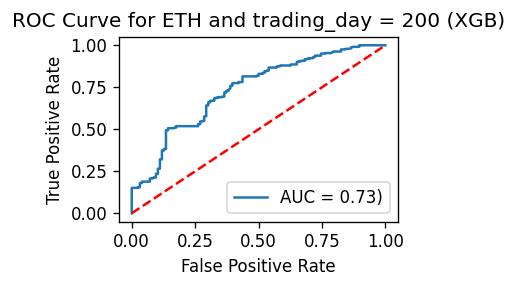

### 📊 Résultats (XGB) : Moyenne, Variance et Écart-Type (crypto = XRP, Trading Day = 200)

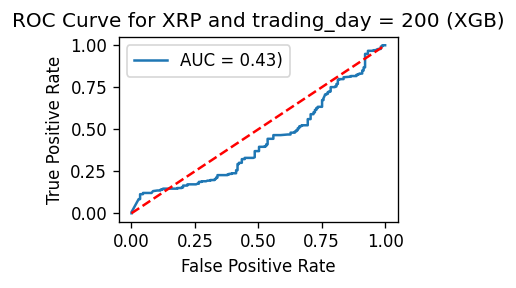

### 📊 Résultats (XGB) : Moyenne, Variance et Écart-Type (crypto = BNB, Trading Day = 200)

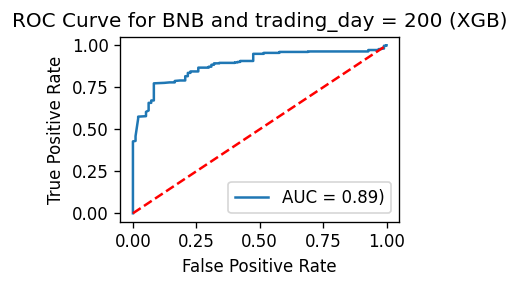

### 📊 Résultats (XGB) : Moyenne, Variance et Écart-Type (crypto = SOL, Trading Day = 200)

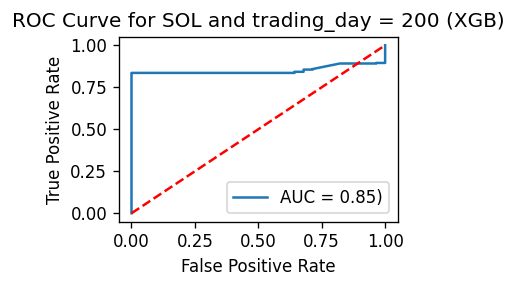

### 📊 Résultats (XGB) : Moyenne, Variance et Écart-Type (crypto = LINK, Trading Day = 200)

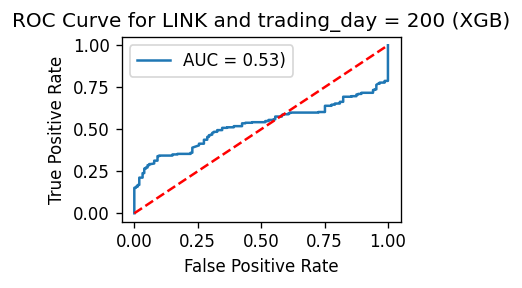

### 📊 Résultats (XGB) : Moyenne, Variance et Écart-Type (crypto = BTC, Trading Day = 225)

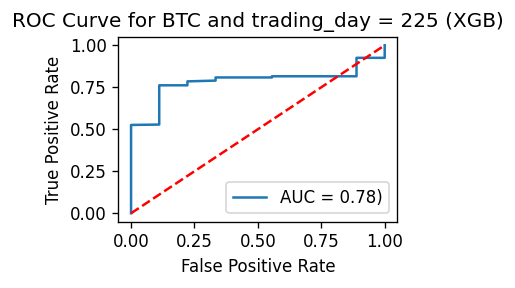

### 📊 Résultats (XGB) : Moyenne, Variance et Écart-Type (crypto = ETH, Trading Day = 225)

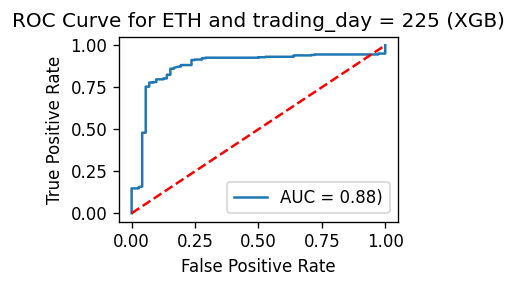

### 📊 Résultats (XGB) : Moyenne, Variance et Écart-Type (crypto = XRP, Trading Day = 225)

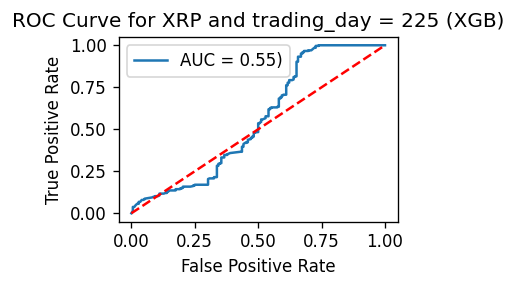

### 📊 Résultats (XGB) : Moyenne, Variance et Écart-Type (crypto = BNB, Trading Day = 225)

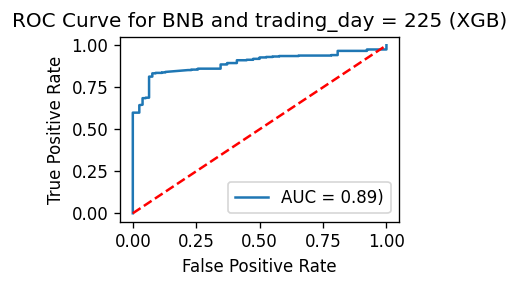

### 📊 Résultats (XGB) : Moyenne, Variance et Écart-Type (crypto = SOL, Trading Day = 225)

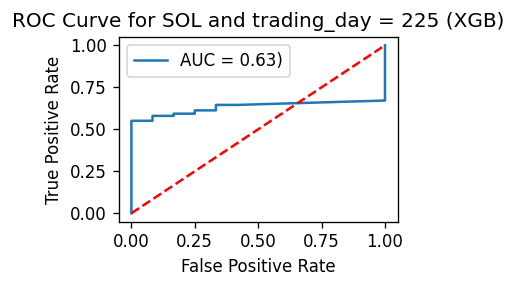

### 📊 Résultats (XGB) : Moyenne, Variance et Écart-Type (crypto = LINK, Trading Day = 225)

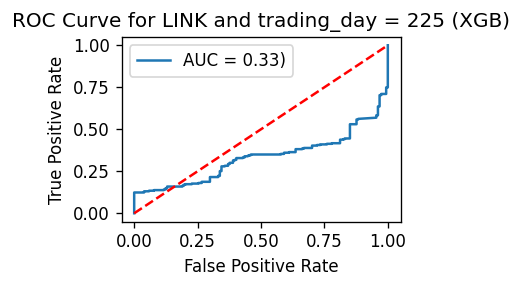

### 📊 Résultats (XGB) : Moyenne, Variance et Écart-Type (crypto = BTC, Trading Day = 250)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  Returns
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1123: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  


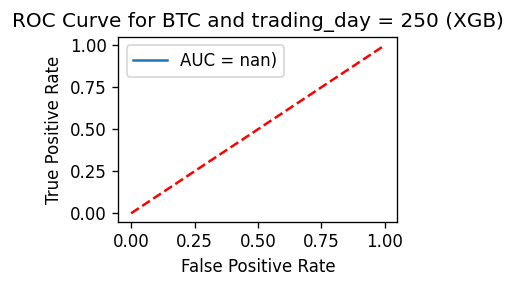

### 📊 Résultats (XGB) : Moyenne, Variance et Écart-Type (crypto = ETH, Trading Day = 250)

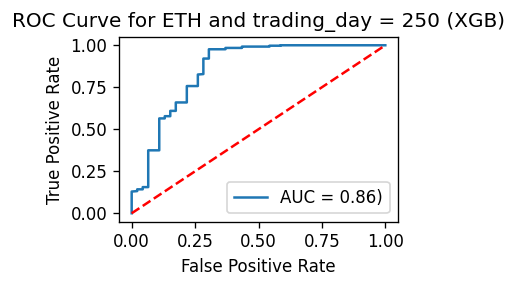

### 📊 Résultats (XGB) : Moyenne, Variance et Écart-Type (crypto = XRP, Trading Day = 250)

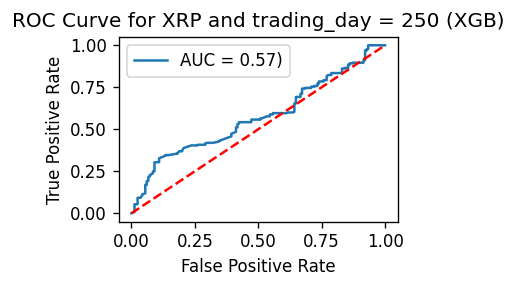

### 📊 Résultats (XGB) : Moyenne, Variance et Écart-Type (crypto = BNB, Trading Day = 250)

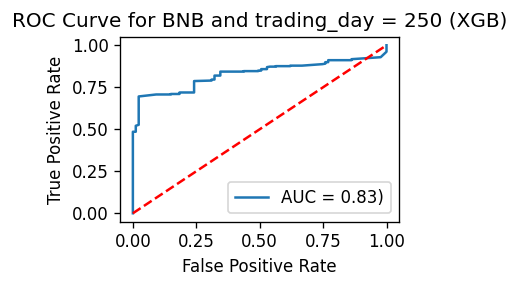

### 📊 Résultats (XGB) : Moyenne, Variance et Écart-Type (crypto = SOL, Trading Day = 250)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  Returns
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1123: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  


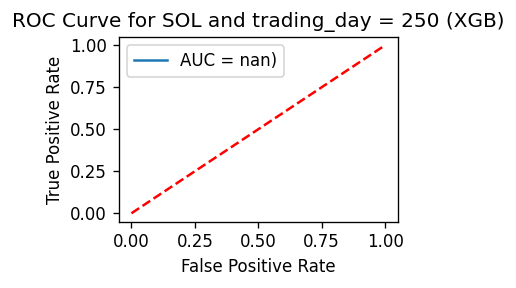

### 📊 Résultats (XGB) : Moyenne, Variance et Écart-Type (crypto = LINK, Trading Day = 250)

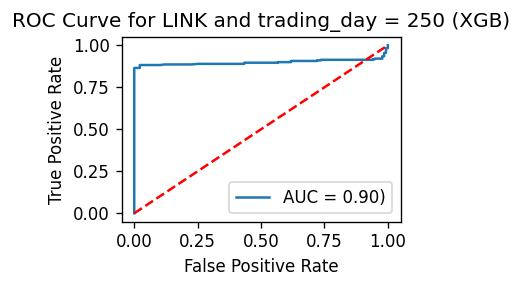

In [17]:
def pipeline_crypto(crypto, crypto_dataframes, trading_day):
    """
    Pipeline complet pour le traitement des données et la modélisation d'une crypto-monnaie.

    Paramètres :
    crypto : str
        Nom de la crypto-monnaie.
    crypto_dataframes : dict
        Dictionnaire des DataFrames de crypto-monnaies.
    trading_day : int
        Nombre de jours de trading utilisés pour la préparation des données.

    Retour :
    None
    """

    print(f"Traitement des données pour {crypto}")

    # Étape 1: Chargement des données
    ohclv_data, close, date = getData(crypto, crypto_dataframes)
    ohclv_data = np.array(ohclv_data)

    # Étape 2: Préparation des données
    X, y, xplot, closeplot, dateplot = prepareData(ohclv_data, close, date, trading_day)

    # Vérification des classes uniques dans y
    print(f"Classes uniques dans y avant traitement: {np.unique(y)}")

    # # Correction des valeurs 0 dans y pour éviter des erreurs
    # y[y == 0] = 1

    # Correction des valeurs de y : convertir -1 en 0
    y = np.where(y == -1, 0, y)

    print(f"Données préparées pour {crypto}, X shape: {X.shape}, y shape: {y.shape}")

    # Affichage des premières lignes des données préparées
    print(f"\nAperçu des 10 premières lignes de X pour {crypto}:")
    print(X[:10])
    print(f"\nAperçu des 10 premières valeurs de y pour {crypto}:")
    print(y[:10])

    # Étape 3: Division des données en ensembles train/test
    indices = np.arange(len(X))  # Création des indices pour suivre les échantillons
    X_train, X_test, y_train, y_test, train_indices, test_indices = train_test_split(
        X, y, indices, shuffle=False, random_state=42
    )

    # Affichage des tailles des ensembles
    print(f"\nTaille des données après split pour {crypto}:")
    print(f"- Taille de X_train : {X_train.shape}")
    print(f"- Taille de X_test  : {X_test.shape}")
    print(f"- Taille de y_train : {y_train.shape}")
    print(f"- Taille de y_test  : {y_test.shape}")

    ####################################################################

    # Calcul de la variance, écart-type et moyenne sur X_train et X_test
    variance_train = np.var(X_train, axis=0)
    ecart_type_train = np.std(X_train, axis=0)
    moyenne_train = np.mean(X_train, axis=0)

    variance_test = np.var(X_test, axis=0)
    ecart_type_test = np.std(X_test, axis=0)
    moyenne_test = np.mean(X_test, axis=0)

    # Création du DataFrame pour afficher les résultats
    df_results = pd.DataFrame({
        "Feature": [f"Feature {i}" for i in range(X_train.shape[1])],
        "Moyenne (Train)": moyenne_train,
        "Variance (Train)": variance_train,
        "Écart-Type (Train)": ecart_type_train,
        "Moyenne (Test)": moyenne_test,
        "Variance (Test)": variance_test,
        "Écart-Type (Test)": ecart_type_test
    })

    # 🔹 Conversion en format sans notation scientifique avec 6 décimales
    df_results = df_results.style.format(precision=3)

    # Création du titre dynamique
    titre_markdown = f"### 📊 Résultats (XGB) : Moyenne, Variance et Écart-Type (crypto = {crypto}, Trading Day = {trading_day})"

    # Affichage du titre et du tableau
    display(Markdown(titre_markdown))
    display(df_results)

    ####################################################################

    # Affichage des indices des ensembles d'entraînement et de test
    print(f"\nIndices des données de 'train' pour {crypto}:")
    print(train_indices)
    print(f"\nIndices des données de 'test' pour {crypto}:")
    print(test_indices)

    # Comptage des classes dans les ensembles
    train_counts = Counter(y_train)
    test_counts = Counter(y_test)

    print(f"\nDistribution des étiquettes dans y_train pour {crypto}:")
    print(f"Nombre de +1: {train_counts[1]}, Nombre de -1: {train_counts[-1]}")
    print(f"\nDistribution des étiquettes dans y_test pour {crypto}:")
    print(f"Nombre de +1: {test_counts[1]}, Nombre de -1: {test_counts[-1]}")

    ####################################################################

    # Étape 4: Modélisation avec XGB
    model = xgb.XGBClassifier(
        n_estimators=100,
        max_depth=3,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        gamma=0,
        reg_alpha=0,
        reg_lambda=1,
        eval_metric="logloss"
    )

    # Évaluation par validation croisée
    scores = cross_val_score(model, X_train, y_train, cv=5)

    print("\nCross Validation scores:")
    for i, score in enumerate(scores):
        print(f"Validation Set {i} score: {score:.4f}")

    # Entraînement du modèle
    model.fit(X_train, y_train)

    # Prédiction sur l'ensemble de test
    y_pred = model.predict(X_test)

    ####################################################################

    # Étape 5: Évaluation des performances
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    specificity = recall_score(y_test, y_pred, pos_label=0)

    print("\nRésultats sur 'test':")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall (Sensitivity): {recall:.4f}")
    print(f"Specificity: {specificity:.4f}")

    # Étape 6: Tracé de la courbe ROC + plotClassificationResult
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=1)
    # auc_score = auc(fpr, tpr)

    if len(np.unique(y_test)) < 2:
        print(f"Attention: y_test ne contient qu'une seule classe, impossible de calculer AUC.")
        auc_score = np.nan
    else:
        if np.unique(y_prob).size == 1:
            print("Attention: y_prob contient une seule valeur, courbe ROC invalide.")
            auc_score = np.nan
        else:
            fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=1)
            auc_score = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f})")
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {crypto} and trading_day = {trading_day} (XGB)')
    plt.legend()
    plt.show()

    #plotClassificationResult(y_test, y_pred)

##############################################################################

# import sys
# import io

# # Désactiver temporairement print()
# sys.stdout = io.StringIO()

# Définir une taille globale plus petite pour toutes les figures
plt.rcParams['figure.figsize'] = (3, 2)
plt.rcParams['figure.dpi'] = 120

# cryptos
cryptos = ["BTC", "ETH", "XRP", "BNB", "SOL", "LINK"]

# Trading_Days
Trading_Days = [5, 10, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250]

# Exécuter le pipeline sans afficher print()
for Trading_Day in Trading_Days:
    for crypto in cryptos:
        pipeline_crypto(crypto, crypto_dataframes, Trading_Day)
        plt.show()

# # Réactiver print() pour affichage normal
# sys.stdout = sys.__stdout__

## Comparaison entre des fenêtres avec RandomForestClassifier

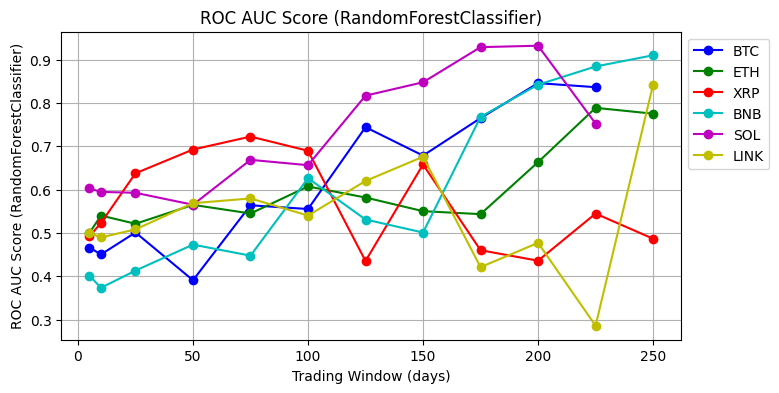

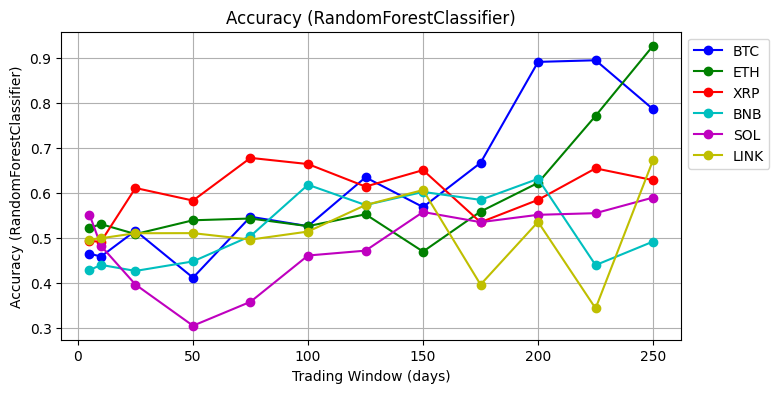

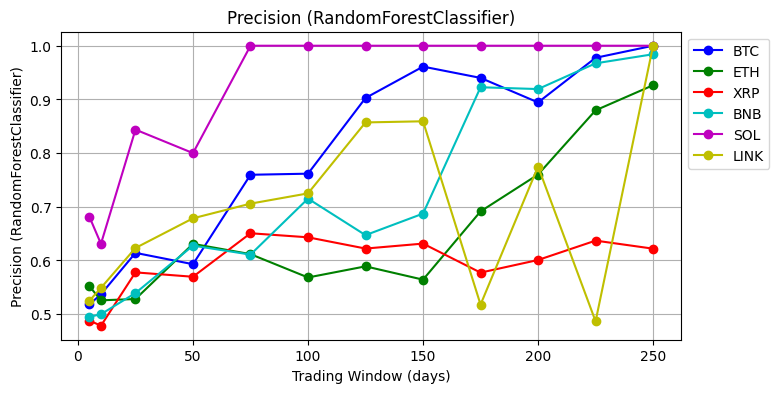

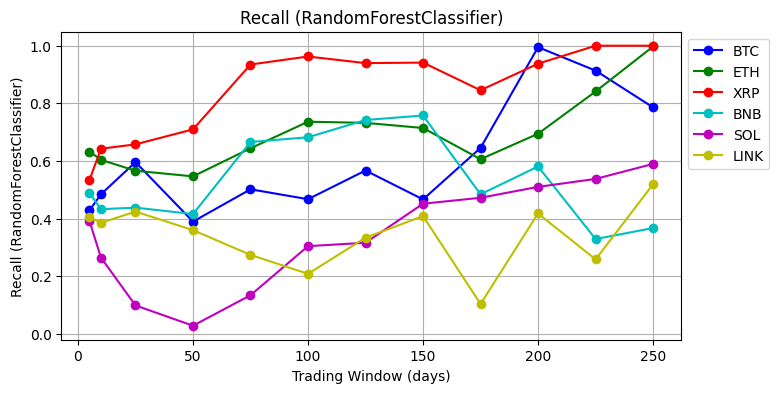

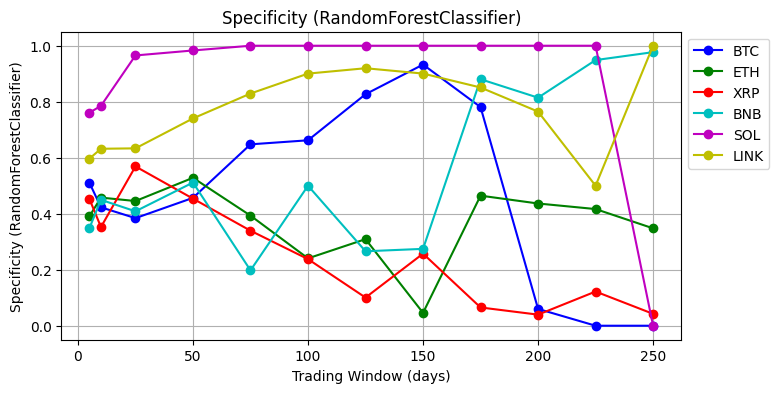

### 📊 Volatilité des métriques sur la période analysée (RandomForest)

Crypto  Volatilité AUC  Volatilité Accuracy  Volatilité Precision  \
0    BTC        0.154998             0.158052              0.174127   
1    ETH        0.091552             0.125203              0.129861   
2    XRP        0.103570             0.061116              0.054877   
3    BNB        0.192446             0.077358              0.175607   
4    SOL        0.132025             0.086483              0.132713   
5   LINK        0.131219             0.082481              0.153832   

   Volatilité Recall  Volatilité Specificity  
0           0.188113                0.306548  
1           0.121699                0.122726  
2           0.154990                0.173944  
3           0.142317                0.270108  
4           0.175323                0.276269  
5           0.108443                0.147412

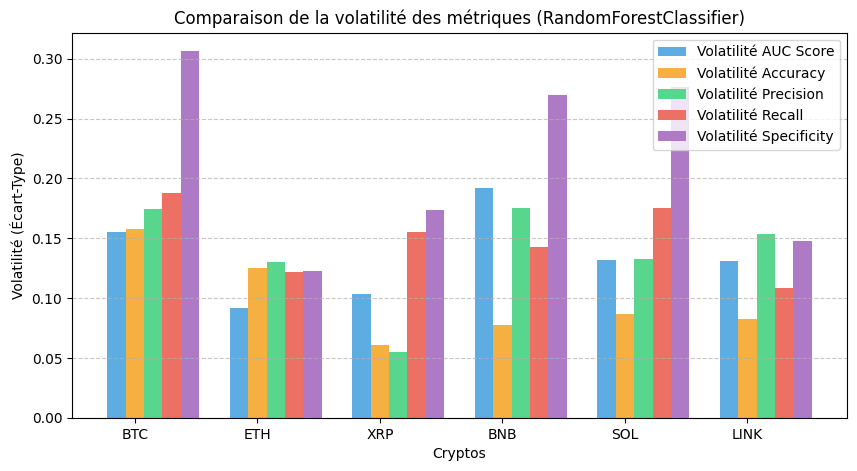

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
# Désactiver temporairement print()
sys.stdout = io.StringIO()

# Création d'un DataFrame pour stocker les résultats
df_summary = []

# Dictionnaires pour stocker les métriques
auc_results = {crypto: [] for crypto in ["BTC", "ETH", "XRP", "BNB", "SOL", "LINK"]}
accuracy_results = {crypto: [] for crypto in ["BTC", "ETH", "XRP", "BNB", "SOL", "LINK"]}
precision_results = {crypto: [] for crypto in ["BTC", "ETH", "XRP", "BNB", "SOL", "LINK"]}
recall_results = {crypto: [] for crypto in ["BTC", "ETH", "XRP", "BNB", "SOL", "LINK"]}
specificity_results = {crypto: [] for crypto in ["BTC", "ETH", "XRP", "BNB", "SOL", "LINK"]}

def pipeline_crypto_rf(crypto, crypto_dataframes, trading_day):
    """
    Pipeline complet pour le traitement des données et la modélisation d'une crypto-monnaie.

    Paramètres :
    crypto : str
        Nom de la crypto-monnaie.
    crypto_dataframes : dict
        Dictionnaire des DataFrames de crypto-monnaies.
    trading_day : int
        Nombre de jours de trading utilisés pour la préparation des données.

    Retour :
    None
    """

    print(f"Traitement des données pour {crypto} avec Trading_Day = {trading_day}")

    # Étape 1: Chargement des données
    ohclv_data, close, date = getData(crypto, crypto_dataframes)
    ohclv_data = np.array(ohclv_data)

    # Étape 2: Préparation des données
    X, y, xplot, closeplot, dateplot = prepareData(ohclv_data, close, date, trading_day)

    # Correction des valeurs de y : convertir -1 en 0
    y = np.where(y == -1, 0, y)

    # Étape 3: Division des données en ensembles train/test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, shuffle=False, random_state=42
    )

    # Étape 4: Modélisation avec RandomForest
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Prédiction sur l'ensemble de test
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Vérifier si y_test a au moins 2 classes
    if len(np.unique(y_test)) < 2:
        print(f"Attention: y_test de {crypto} ne contient qu'une seule classe, AUC non calculable.")
        auc_score = np.nan
    else:
        fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=1)
        auc_score = auc(fpr, tpr)

    # Calcul des métriques de classification
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1, zero_division=0)
    recall = recall_score(y_test, y_pred, pos_label=1, zero_division=0)
    specificity = recall_score(y_test, y_pred, pos_label=0, zero_division=0)

    # Stocker les valeurs
    auc_results[crypto].append(auc_score)
    accuracy_results[crypto].append(accuracy)
    precision_results[crypto].append(precision)
    recall_results[crypto].append(recall)
    specificity_results[crypto].append(specificity)

# Liste des Trading_Days et cryptos
Trading_Days = [5, 10, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250]
cryptos = ["BTC", "ETH", "XRP", "BNB", "SOL", "LINK"]

# Exécuter le pipeline pour chaque Trading_Day et chaque crypto
for Trading_Day in Trading_Days:
    for crypto in cryptos:
        pipeline_crypto_rf(crypto, crypto_dataframes, Trading_Day)

# Tracer les graphiques (chacun sur une figure séparée)
metrics = {
    "ROC AUC Score (RandomForestClassifier)": auc_results,
    "Accuracy (RandomForestClassifier)": accuracy_results,
    "Precision (RandomForestClassifier)": precision_results,
    "Recall (RandomForestClassifier)": recall_results,
    "Specificity (RandomForestClassifier)": specificity_results
}

colors = ['b', 'g', 'r', 'c', 'm', 'y']  # Couleurs pour chaque crypto

# Boucle pour tracer chaque graphique sur une figure séparée
for title, metric in metrics.items():
    plt.figure(figsize=(8, 4))  # Crée une nouvelle figure pour chaque metric
    for idx, crypto in enumerate(cryptos):
        plt.plot(Trading_Days, metric[crypto], marker='o', linestyle='-', label=f"{crypto}", color=colors[idx])
    plt.xlabel("Trading Window (days)")
    plt.ylabel(title)
    plt.title(title)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1)) # Déplacer la légende en dehors du graphique
    plt.grid()
    plt.show()  # Affiche chaque plot immédiatement

################################################################################

# 📌 Ajout du calcul de la volatilité (écart-type des métriques)
volatility_results = {
    "Crypto": [],
    "Volatilité AUC": [],
    "Volatilité Accuracy": [],
    "Volatilité Precision": [],
    "Volatilité Recall": [],
    "Volatilité Specificity": []
}

for crypto in cryptos:
    auc_std = np.nanstd(auc_results[crypto])  # ✅ Remplacé np.std() par np.nanstd()
    acc_std = np.nanstd(accuracy_results[crypto])
    prec_std = np.nanstd(precision_results[crypto])
    rec_std = np.nanstd(recall_results[crypto])
    spec_std = np.nanstd(specificity_results[crypto])

     # Vérifier si au moins une métrique est valide
    if not (np.isnan(auc_std) and np.isnan(acc_std) and np.isnan(prec_std) and np.isnan(rec_std) and np.isnan(spec_std)):
        volatility_results["Crypto"].append(crypto)

        # Ajouter uniquement si la valeur est non-NaN
        volatility_results["Volatilité AUC"].append(auc_std if not np.isnan(auc_std) else None)
        volatility_results["Volatilité Accuracy"].append(acc_std if not np.isnan(acc_std) else None)
        volatility_results["Volatilité Precision"].append(prec_std if not np.isnan(prec_std) else None)
        volatility_results["Volatilité Recall"].append(rec_std if not np.isnan(rec_std) else None)
        volatility_results["Volatilité Specificity"].append(spec_std if not np.isnan(spec_std) else None)

# Convertir en DataFrame pour affichage
df_volatility = pd.DataFrame(volatility_results)

# 🔹 Affichage du tableau des volatilités
display(Markdown("### 📊 Volatilité des métriques sur la période analysée (RandomForest)"))
display(df_volatility)

# 📊 Tracer les graphiques des volatilités pour chaque métrique
metrics = {
    "Volatilité AUC": "Volatilité AUC Score",
    "Volatilité Accuracy": "Volatilité Accuracy",
    "Volatilité Precision": "Volatilité Precision",
    "Volatilité Recall": "Volatilité Recall",
    "Volatilité Specificity": "Volatilité Specificity"
}

# Largeur des barres (moins large pour éviter l'overlapping)
width = 0.15  # Ajuster pour espacer les barres

# Positions des cryptos (axe X)
x = np.arange(len(df_volatility["Crypto"]))  # Index des cryptos

# Palette de couleurs plus douces et lisibles
colors = ["#5DADE2", "#F5B041", "#58D68D", "#EC7063", "#AF7AC5"]  # Bleu, Orange, Vert, Rouge clair, Violet

plt.figure(figsize=(10, 5))

# Tracer chaque métrique avec un décalage pour éviter l'overlapping
for idx, (col, title) in enumerate(metrics.items()):
    plt.bar(x + idx * width, df_volatility[col], width=width, label=title, color=colors[idx])

# Mise en forme du graphique
plt.xticks(x + width, df_volatility["Crypto"])  # Ajuster labels de l'axe X
plt.xlabel("Cryptos")
plt.ylabel("Volatilité (Écart-Type)")
plt.title("Comparaison de la volatilité des métriques (RandomForestClassifier)")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

################################################################################

# Création d'un DataFrame pour stocker les résultats
df_summary = []

# Boucle à travers chaque crypto et chaque Trading Window
for crypto in cryptos:
    for i, trading_day in enumerate(Trading_Days):
        df_summary.append({
            "Company Name": crypto,
            "Trading Window": trading_day,
            "Accuracy": accuracy_results[crypto][i],
            "Recall": recall_results[crypto][i],
            "Precision": precision_results[crypto][i],
            "Specificity": specificity_results[crypto][i]
        })

# Convertir en DataFrame
df_summary = pd.DataFrame(df_summary)

# Arrondir les valeurs à 2 décimales
df_summary = df_summary.round(2)

# Définir le chemin pour enregistrer le fichier Excel 
file_path1 = "resume_performances_randomforest.xlsx"

# Sauvegarder sous format Excel
df_summary.to_excel(file_path1, index=False)



## Comparaison entre des fenêtres avec XGBClassifier

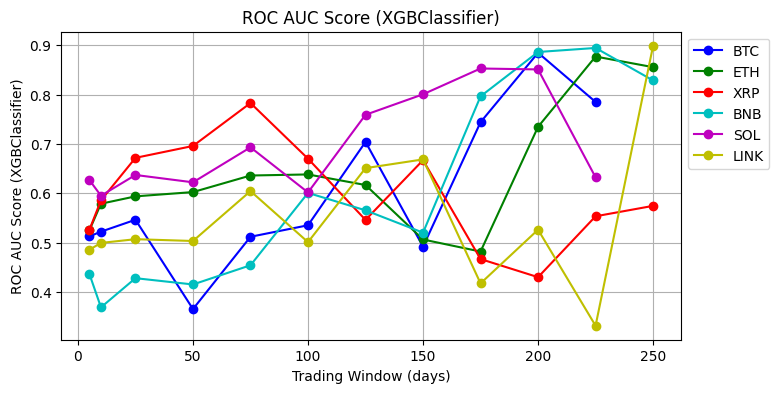

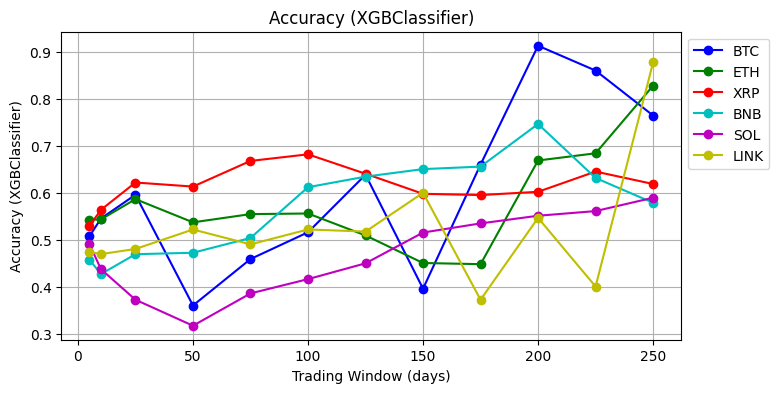

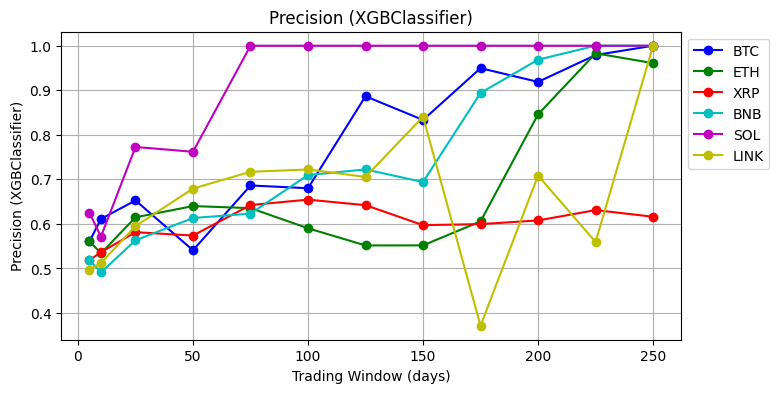

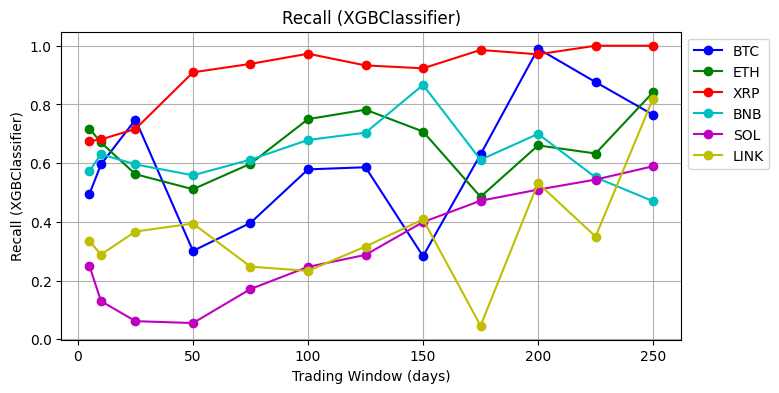

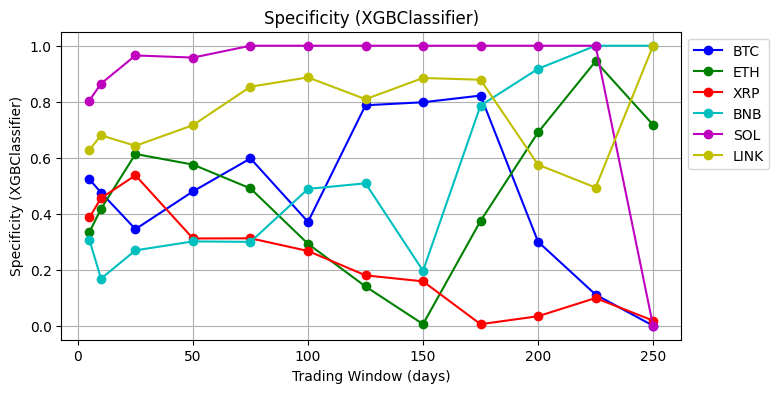

### 📊 Volatilité des métriques sur la période analysée (XGB)

Crypto  Volatilité AUC  Volatilité Accuracy  Volatilité Precision  \
0    BTC        0.148334             0.167342              0.162989   
1    ETH        0.120873             0.102141              0.154748   
2    XRP        0.097948             0.040533              0.040326   
3    BNB        0.189774             0.096608              0.179294   
4    SOL        0.095504             0.081794              0.157707   
5   LINK        0.137806             0.121845              0.159700   

   Volatilité Recall  Volatilité Specificity  
0           0.208392                0.250898  
1           0.103486                0.250500  
2           0.119797                0.169101  
3           0.095907                0.306148  
4           0.181023                0.273005  
5           0.177901                0.146854

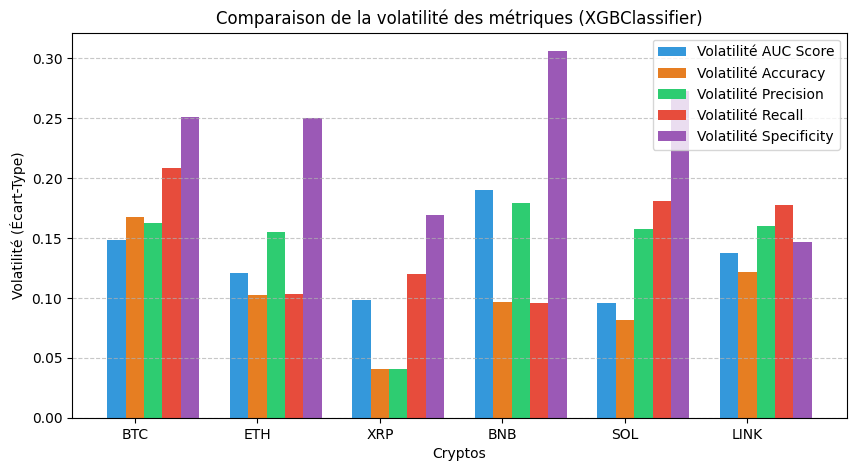

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
# Dictionnaires pour stocker les métriques
auc_results = {crypto: [] for crypto in ["BTC", "ETH", "XRP", "BNB", "SOL", "LINK"]}
accuracy_results = {crypto: [] for crypto in ["BTC", "ETH", "XRP", "BNB", "SOL", "LINK"]}
precision_results = {crypto: [] for crypto in ["BTC", "ETH", "XRP", "BNB", "SOL", "LINK"]}
recall_results = {crypto: [] for crypto in ["BTC", "ETH", "XRP", "BNB", "SOL", "LINK"]}
specificity_results = {crypto: [] for crypto in ["BTC", "ETH", "XRP", "BNB", "SOL", "LINK"]}

def pipeline_crypto(crypto, crypto_dataframes, trading_day):
    """
    Pipeline complet pour le traitement des données et la modélisation d'une crypto-monnaie.

    Paramètres :
    crypto : str
        Nom de la crypto-monnaie.
    crypto_dataframes : dict
        Dictionnaire des DataFrames de crypto-monnaies.
    trading_day : int
        Nombre de jours de trading utilisés pour la préparation des données.

    Retour :
    None
    """

    print(f"Traitement des données pour {crypto} avec Trading_Day = {trading_day}")

    # Étape 1: Chargement des données
    ohclv_data, close, date = getData(crypto, crypto_dataframes)
    ohclv_data = np.array(ohclv_data)

    # Étape 2: Préparation des données
    X, y, xplot, closeplot, dateplot = prepareData(ohclv_data, close, date, trading_day)

    # Correction des valeurs de y : convertir -1 en 0
    y = np.where(y == -1, 0, y)

    # Étape 3: Division des données en ensembles train/test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, shuffle=False, random_state=42
    )

    # Étape 4: Modélisation avec XGB
    model = xgb.XGBClassifier(
          n_estimators=100,
          max_depth=3,
          learning_rate=0.1,
          subsample=0.8,
          colsample_bytree=0.8,
          gamma=0,
          reg_alpha=0,
          reg_lambda=1,
          eval_metric="auc"
    )
    model.fit(X_train, y_train)

    # Prédiction sur l'ensemble de test
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Vérifier si y_test a au moins 2 classes
    if len(np.unique(y_test)) < 2:
        print(f"Attention: y_test de {crypto} ne contient qu'une seule classe, AUC non calculable.")
        auc_score = np.nan
    else:
        fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=1)
        auc_score = auc(fpr, tpr)

    # Calcul des métriques de classification
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1, zero_division=0)
    recall = recall_score(y_test, y_pred, pos_label=1, zero_division=0)
    specificity = recall_score(y_test, y_pred, pos_label=0, zero_division=0)

    # Stocker les valeurs
    auc_results[crypto].append(auc_score)
    accuracy_results[crypto].append(accuracy)
    precision_results[crypto].append(precision)
    recall_results[crypto].append(recall)
    specificity_results[crypto].append(specificity)

# Liste des Trading_Days et cryptos
Trading_Days = [5, 10, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250]
cryptos = ["BTC", "ETH", "XRP", "BNB", "SOL", "LINK"]

# Exécuter le pipeline pour chaque Trading_Day et chaque crypto
for Trading_Day in Trading_Days:
    for crypto in cryptos:
        pipeline_crypto(crypto, crypto_dataframes, Trading_Day)

# Tracer les graphiques (chacun sur une figure séparée)
metrics = {
    "ROC AUC Score (XGBClassifier)": auc_results,
    "Accuracy (XGBClassifier)": accuracy_results,
    "Precision (XGBClassifier)": precision_results,
    "Recall (XGBClassifier)": recall_results,
    "Specificity (XGBClassifier)": specificity_results
}

colors = ['b', 'g', 'r', 'c', 'm', 'y']  # Couleurs pour chaque crypto

# Boucle pour tracer chaque graphique sur une figure séparée
for title, metric in metrics.items():
    plt.figure(figsize=(8, 4))  # Crée une nouvelle figure pour chaque metric
    for idx, crypto in enumerate(cryptos):
        plt.plot(Trading_Days, metric[crypto], marker='o', linestyle='-', label=f"{crypto}", color=colors[idx])
    plt.xlabel("Trading Window (days)")
    plt.ylabel(title)
    plt.title(title)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1)) # Déplacer la légende en dehors du graphique
    plt.grid()
    plt.show()  # Affiche chaque plot immédiatement

################################################################################

# 📌 Ajout du calcul de la volatilité (écart-type des métriques)
volatility_results = {
    "Crypto": [],
    "Volatilité AUC": [],
    "Volatilité Accuracy": [],
    "Volatilité Precision": [],
    "Volatilité Recall": [],
    "Volatilité Specificity": []
}

for crypto in cryptos:
    auc_std = np.nanstd(auc_results[crypto])  # ✅ Remplacé np.std() par np.nanstd()
    acc_std = np.nanstd(accuracy_results[crypto])
    prec_std = np.nanstd(precision_results[crypto])
    rec_std = np.nanstd(recall_results[crypto])
    spec_std = np.nanstd(specificity_results[crypto])

     # Vérifier si au moins une métrique est valide
    if not (np.isnan(auc_std) and np.isnan(acc_std) and np.isnan(prec_std) and np.isnan(rec_std) and np.isnan(spec_std)):
        volatility_results["Crypto"].append(crypto)

        # Ajouter uniquement si la valeur est non-NaN
        volatility_results["Volatilité AUC"].append(auc_std if not np.isnan(auc_std) else None)
        volatility_results["Volatilité Accuracy"].append(acc_std if not np.isnan(acc_std) else None)
        volatility_results["Volatilité Precision"].append(prec_std if not np.isnan(prec_std) else None)
        volatility_results["Volatilité Recall"].append(rec_std if not np.isnan(rec_std) else None)
        volatility_results["Volatilité Specificity"].append(spec_std if not np.isnan(spec_std) else None)

# Convertir en DataFrame pour affichage
df_volatility = pd.DataFrame(volatility_results)

# 🔹 Affichage du tableau des volatilités
display(Markdown("### 📊 Volatilité des métriques sur la période analysée (XGB)"))
display(df_volatility)

# 📊 Tracer les graphiques des volatilités pour chaque métrique
metrics = {
    "Volatilité AUC": "Volatilité AUC Score",
    "Volatilité Accuracy": "Volatilité Accuracy",
    "Volatilité Precision": "Volatilité Precision",
    "Volatilité Recall": "Volatilité Recall",
    "Volatilité Specificity": "Volatilité Specificity"
}

# Largeur des barres (moins large pour éviter l'overlapping)
width = 0.15  # Ajuster pour espacer les barres

# Positions des cryptos (axe X)
x = np.arange(len(df_volatility["Crypto"]))  # Index des cryptos

# Palette de couleurs plus douces et lisibles
colors = ["#3498DB", "#E67E22", "#2ECC71", "#E74C3C", "#9B59B6"]  # Bleu doux, Orange chaud, Vert éclatant, Rouge corail, Violet doux

plt.figure(figsize=(10, 5))

# Tracer chaque métrique avec un décalage pour éviter l'overlapping
for idx, (col, title) in enumerate(metrics.items()):
    plt.bar(x + idx * width, df_volatility[col], width=width, label=title, color=colors[idx])

# Mise en forme du graphique
plt.xticks(x + width, df_volatility["Crypto"])  # Ajuster labels de l'axe X
plt.xlabel("Cryptos")
plt.ylabel("Volatilité (Écart-Type)")
plt.title("Comparaison de la volatilité des métriques (XGBClassifier)")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

###############################################################################

# Création d'un DataFrame pour stocker les résultats
df_summary = []

# Boucle à travers chaque crypto et chaque Trading Window
for crypto in cryptos:
    for i, trading_day in enumerate(Trading_Days):
        df_summary.append({
            "Company Name": crypto,
            "Trading Window": trading_day,
            "Accuracy": accuracy_results[crypto][i],
            "Recall": recall_results[crypto][i],
            "Precision": precision_results[crypto][i],
            "Specificity": specificity_results[crypto][i]
        })

# Convertir en DataFrame
df_summary = pd.DataFrame(df_summary)

# Arrondir les valeurs à 2 décimales
df_summary = df_summary.round(2)

# Définir le chemin pour enregistrer le fichier Excel 
file_path2 = "resume_performances_xgb_classifier.xlsx"

# Sauvegarder sous format Excel
df_summary.to_excel(file_path2, index=False)
